<a href="https://colab.research.google.com/github/mrpintime/Student_Performance_V1/blob/main/Student_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Performance Analysis in Secondary Education
**Created by mrpintime**

# DataSet Information  

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).  

# Attribute Information:  

### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:  
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)  
2 sex - student's sex (binary: 'F' - female or 'M' - male)  
3 age - student's age (numeric: from 15 to 22)  
4 address - student's home address type (binary: 'U' - urban or 'R' - rural)  
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)  
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)  
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)  
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4- higher education)  
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')  
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')  
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')  
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')  
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)  
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)  
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)  
16 schoolsup - extra educational support (binary: yes or no)  
17 famsup - family educational support (binary: yes or no)  
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)  
19 activities - extra-curricular activities (binary: yes or no)  
20 nursery - attended nursery school (binary: yes or no)  
21 higher - wants to take higher education (binary: yes or no)  
22 internet - Internet access at home (binary: yes or no)  
23 romantic - with a romantic relationship (binary: yes or no)  
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)  
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)  
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)  
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)  
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)  
29 health - current health status (numeric: from 1 - very bad to 5 - very good)  
30 absences - number of school absences (numeric: from 0 to 93)  

# these grades are related with the course subject, Math or Portuguese:  
31 G1 - first period grade (numeric: from 0 to 20)  
31 G2 - second period grade (numeric: from 0 to 20)  
32 G3 - final grade (numeric: from 0 to 20, output target)


# Problem
The main problem here that we can turn it into business advantage is to find out that students progress from demographic and family relation data and personal features.
## Advantage
1. **Easy to collect data**: Predict scores of student using easy to collect data

2. **Targeted Intervention and Support**: By predicting which students may struggle to achieve high scores, teachers and staff can intervene early, offering additional support, resources, and personalized attention. This can improve student outcomes and overall school performance.

3. **Resource Allocation**: Schools can more effectively allocate resources, such as tutors, materials, and time, based on the predictions. This ensures that resources are not wasted and are directed where they are most needed.

4. **Student Performance Tracking**: The model can track student performance over time, providing valuable data on the effectiveness of teaching strategies and interventions. This can help in continuous improvement of educational practices.

5. **Parental and Student Engagement**: Providing students and parents with insights into potential performance can motivate both to take proactive steps for improvement, leading to better engagement with the educational process.

6. **Marketing and Reputation Building**: Improved student outcomes can enhance the school's reputation, making it more attractive to prospective students and parents, and potentially increasing enrollment and funding opportunities.

7. **Identifying At-Risk Students** and many more.

---

# Objects
1. Understand relations between features and G1-G2-G3 Scores of Students  
2. Find effective features that have significant impact on Scores of Students
3. Develpe Machine Learnirng model to predict student score in percise and efficient way  
4. Create a Report For Approche

# Outlines  
> 0. Setup
> 1. Dataset Cleaning  
> 2. Exploratory Data Analysis   
> 3. Outlier Detection
> 4. Feature Engineering
> 5. PCA, Deep Learning Encoder   
> 6. Machine Learning Implementation
  1. Preprocessing
  2. Traditional Machine Learning
  3. Deep Learning Model *
> 7. Results
> 8. Conclusion
> 9. Next Steps

# Setup

In [ ]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
#for use ANOVA and Fine-tuning using random Search
from scipy import stats
# to clear RAM
import gc

#subpress warnings
def warn(*args, **kwargs):
  pass
import warnings
warnings.warn = warn


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Preprocessing allows us to standarsize our data
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
# Allows us to split our data into training and testing data and evaluate data on k-fold
from sklearn.model_selection import cross_val_score, train_test_split
# Import PCA Transformation
from sklearn.decomposition import PCA
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# evaluate Linear regression model
from sklearn.metrics import mean_squared_error
# import deep learning model
# import tensorflow as tf


%matplotlib inline

In [ ]:
# import dataset
#dataset url https://archive.ics.uci.edu/ml/datasets/student+performance#
df_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Student Performance/dataset/merged.csv")

In [ ]:
df = df_data.copy() # save original dataset

# Dataset Cleaning

Check Name of Columns

In [ ]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

I think columns already are in the best way to express with respect to thier name.

based on dataset information we know that `G1`,`G2`,`G3` are highly correlated therefore for simplicity we only use check releation between features and `G3`.

In [ ]:
df[['G1','G2','G3']].cov() # covariance matrix

G1         G2         G3
G1  8.900639   8.416207   9.329573
G2  8.416207  10.791692  11.562913
G3  9.329573  11.562913  14.936647

In [ ]:
df[['G1','G2','G3']].corr() # Pearson correlation matrix

G1        G2        G3
G1  1.000000  0.858739  0.809142
G2  0.858739  1.000000  0.910743
G3  0.809142  0.910743  1.000000

We can see G1, G2, G3 are highly correlated

Check null and redundant values

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.index.is_unique

True

In [ ]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

We do not have any `duplicate` and `null` values.

Lets see info of Dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [ ]:
num_columns = df.select_dtypes(exclude='object').columns.to_list()
num_columns

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [ ]:
obj_columns = df.select_dtypes(include='object').columns.to_list()
obj_columns

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

We have some numeric columns that are `Not Countable`.  
We have some numeric columns that are encoded version of a `Categorical Variable`.

# Exploratory Data Analysis   
We will do some ```Univariant``` , ```Bivariant``` and ```Multivariant``` Analysis to understand dataset.

In [ ]:
#- we add some numerical variables to obj features category
new_obj = obj_columns + ['famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'traveltime', 'studytime', 'Medu', 'Fedu']
len(new_obj)

27

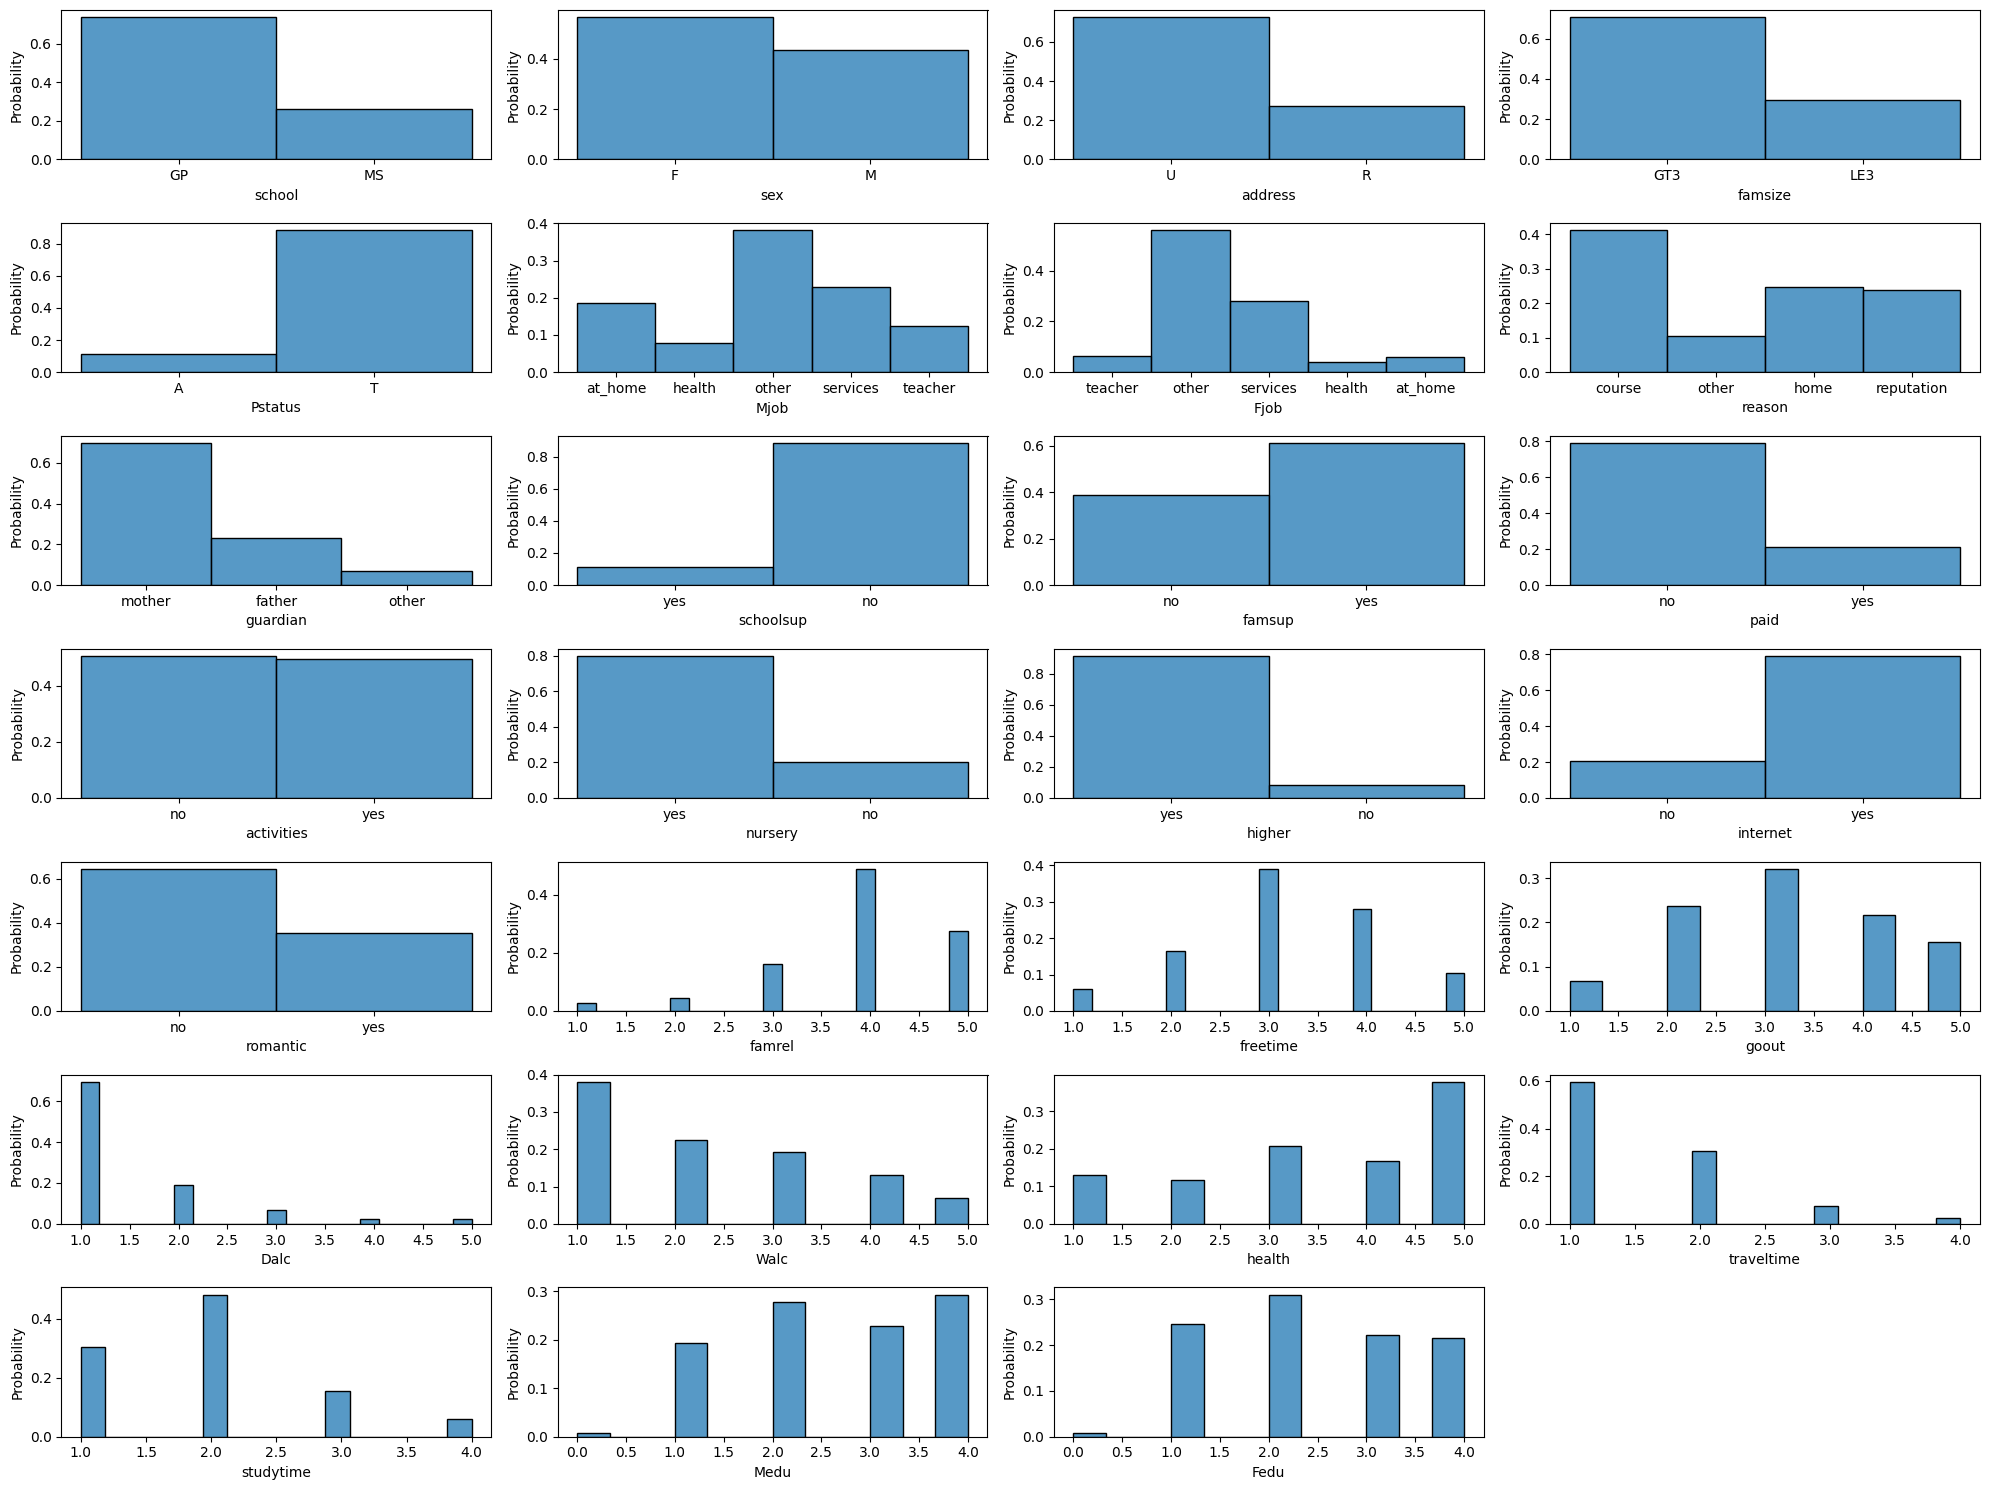

In [ ]:
fig = plt.figure(figsize=(20,15))

for index,i in enumerate(new_obj):

  ax = fig.add_subplot(7,4,index+1)
  sns.histplot(data=df, x=i, stat='probability', ax=ax)
  plt.tight_layout()

* most categorical features have obvious diffrence in their specific values except `activities` that `no` and `yes` are equal in overal.
* Most of student overally situation is :   
    1. are in `GP` school.  
    2. are `Female`.
    3. are in `Urban` area.
    4. have `family size` greater than `3`.  
    5. their `parents` live `together`.  
    6. they do `not` have `Extra educational support`.
    7. they have `family support`.
    8. they did `not` pay money for `extra classes`.  
    9. they attended in `nursery school`.
    10. they want to `take higher education`.
    11. they have `internet connection`.
    12. they do `not` have `romantic relationship`.

---

activities feature means student has extra curricular activities or not that its values are equally spread between `yes` and `no`.

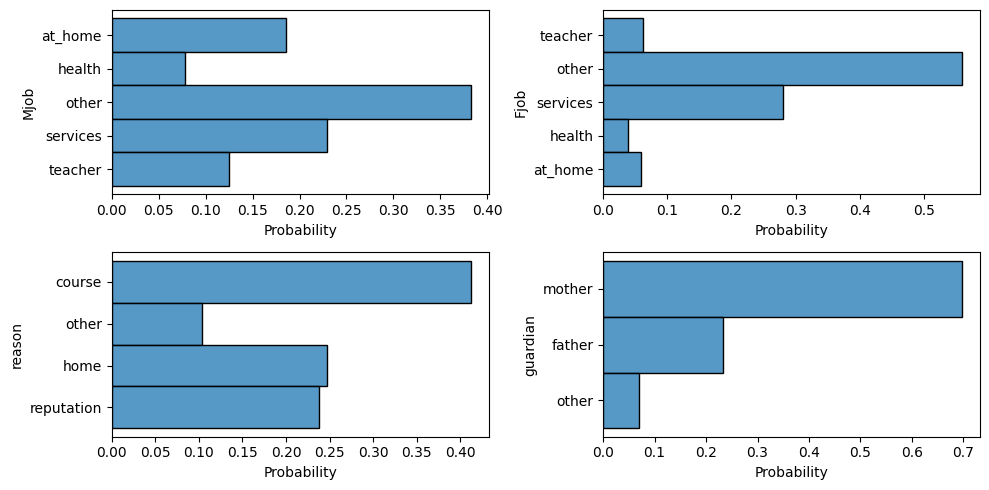

In [ ]:
fig = plt.figure(figsize=(10,5))
for index,i in enumerate(['Mjob', 'Fjob', 'reason', 'guardian']):
    ax = fig.add_subplot(2,2,index+1)
    sns.histplot(y=df[i], stat='probability', ax=ax)
plt.tight_layout()

in overal between students  
* `50 percent` of Fathers and Mothers work at `services jobs (e.g. administrative or police)` or `other`.  
* most student have their `mother` as their `guardian`.
* `home` and `reputation` have equal involment in reason to choose school.
* `course` of the school has the most involment in reson to choose school.  

With all this results we want to see how much `G1, G2, G3 are spread`

In [ ]:
df[['G1','G2','G3']].describe().iloc[1:, ]

G1         G2         G3
mean  11.213602  11.246169  11.341954
std    2.983394   3.285071   3.864796
min    0.000000   0.000000   0.000000
25%    9.000000   9.000000  10.000000
50%   11.000000  11.000000  11.000000
75%   13.000000  13.000000  14.000000
max   19.000000  19.000000  20.000000

here we can see all scores have same mean around `11`, their standard deviations are around `3-4`, minimum is `0` and potential maximum is `20`.  

---

We can have 2 hypothesis:
1. scores of students in one school is equal to other school.  
2. scores of students in one school is normal and in other school is too weak


We use numerci variables that are `not encoded version of Categorical variable`.  
We have `Countable` and `Not Countable` numeric data so we can use `Kernel Density Estimation`.

In [ ]:
set(num_columns) - set(new_obj)

{'G1', 'G2', 'G3', 'absences', 'age', 'failures'}

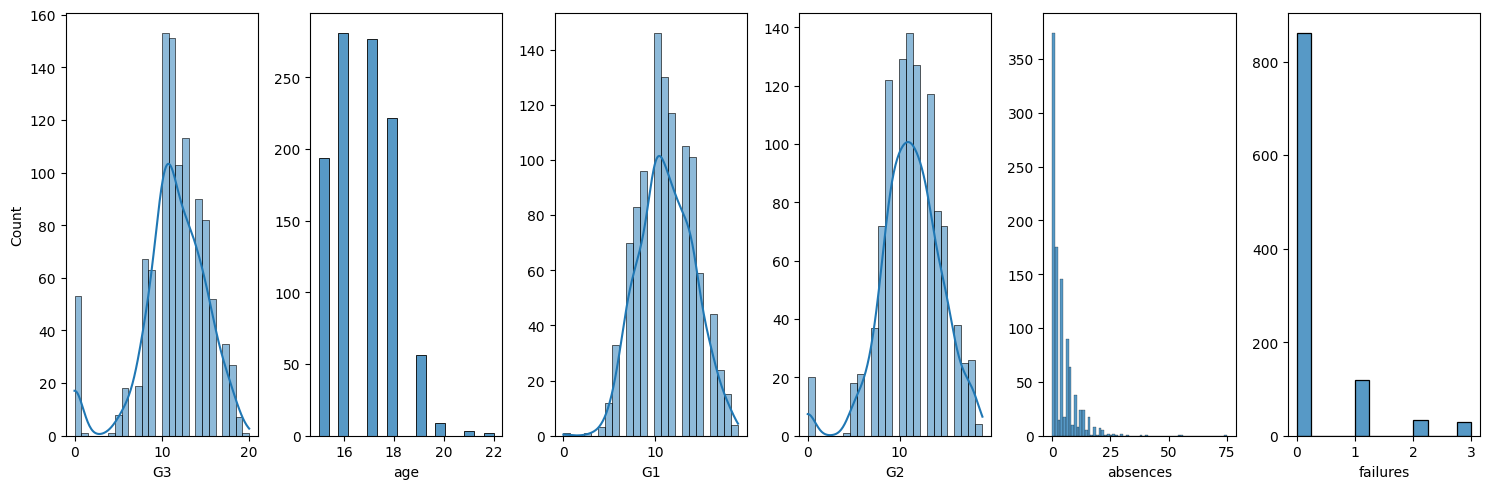

In [ ]:
countable = ['age', 'failures', 'absences']
not_countable = ['G1', 'G1', 'G3']

fig = plt.figure(figsize=(15,5))
for index,i in enumerate(set(num_columns) - set(new_obj)):
    if i in countable:
      ax = fig.add_subplot(1,6,index+1)
      axw = sns.histplot(x=df[i], stat='count', kde=False, ax=ax)
    else:
      ax = fig.add_subplot(1,6,index+1)
      axw = sns.histplot(x=df[i], stat='count', kde=True, ax=ax)
    if index+1 in [1]:
        axw.set_ylabel('Count')
    else:
        axw.set_ylabel('')
plt.tight_layout()

Now we move to `Bivariant` and `Multivariant` Analysis.  

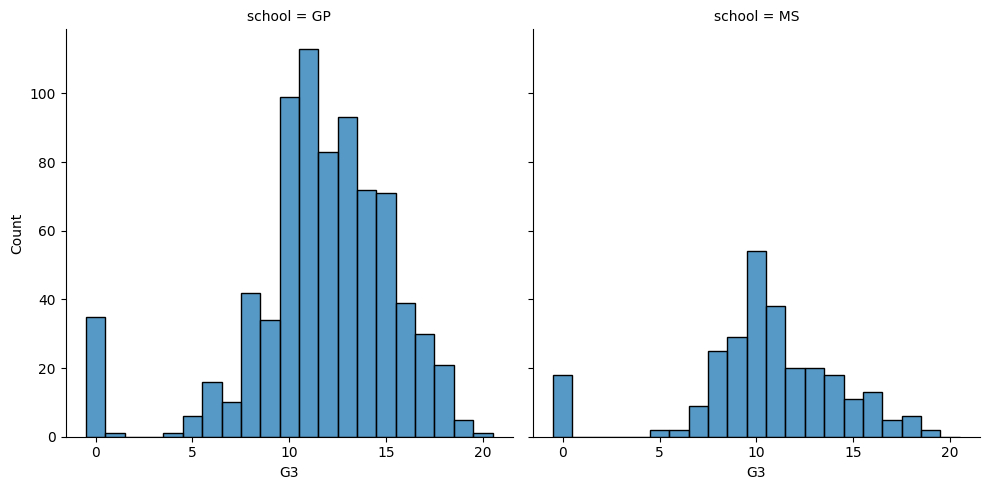

In [ ]:
sns.displot(df, x='G3', col="school", discrete=True) # here in dataset G3 is int64 but in reality it is float64 so here we set discrete to true for int64

In [ ]:
df[['G3', 'school']].groupby('school').mean()

G3
school           
GP      11.633420
MS      10.514706

In [ ]:
df['school'].value_counts(normalize=True)

GP    0.739464
MS    0.260536
Name: school, dtype: float64

We have to consider this fact that `school feature` is `imbalance` feature

lets see originally numeric variable

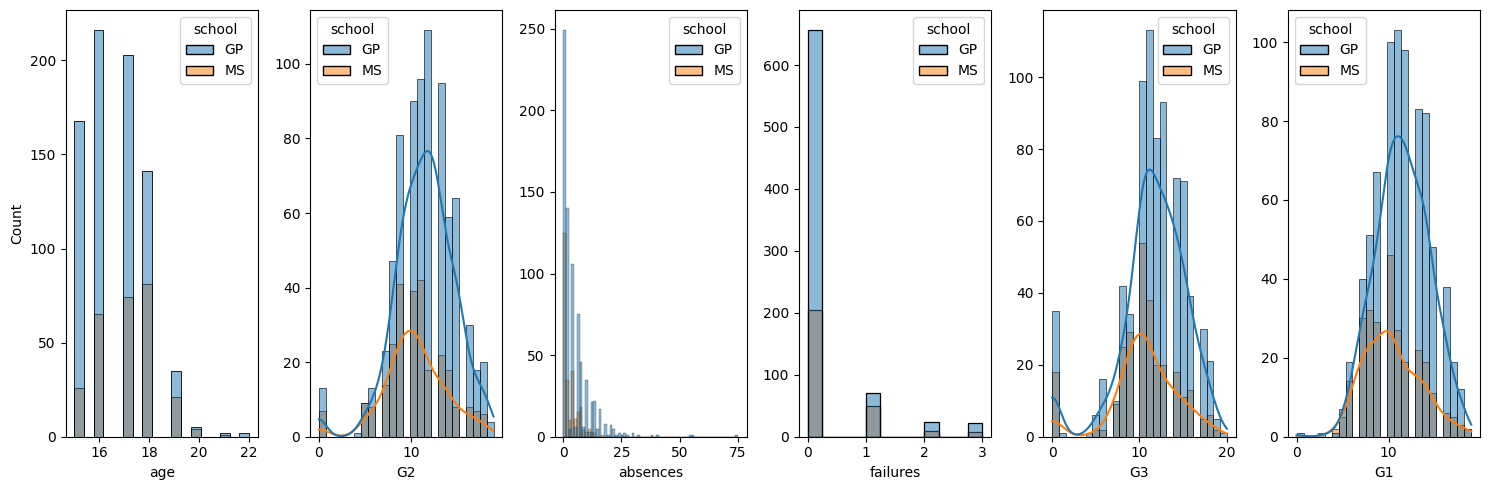

In [ ]:
countable = ['age', 'failures', 'absences']
not_countable = ['G1', 'G1', 'G3']

fig = plt.figure(figsize=(15,5))
for index,i in enumerate(set(num_columns) - set(new_obj)):
    if i in countable:
      ax = fig.add_subplot(1,6,index+1)
      axw = sns.histplot(data=df, x=i, hue='school', stat='count', kde=False, ax=ax)
    else:
      ax = fig.add_subplot(1,6,index+1)
      axw = sns.histplot(data=df, x=i, hue='school', stat='count', kde=True, ax=ax)
    if index+1 in [1]:
        axw.set_ylabel('Count')
    else:
        axw.set_ylabel('')
plt.tight_layout()

Lets see i what way school can affect features distribution.   
We can recreate our previous univariant hitogram plots using `school` as `hue` argument to analyse them in bivariant form.

In [ ]:
df[['internet','school']].groupby('internet').value_counts()

internet  school
no        GP        119
          MS         98
yes       GP        653
          MS        174
dtype: int64

Following Two plots are Example of what we going to have in next grid of plots.

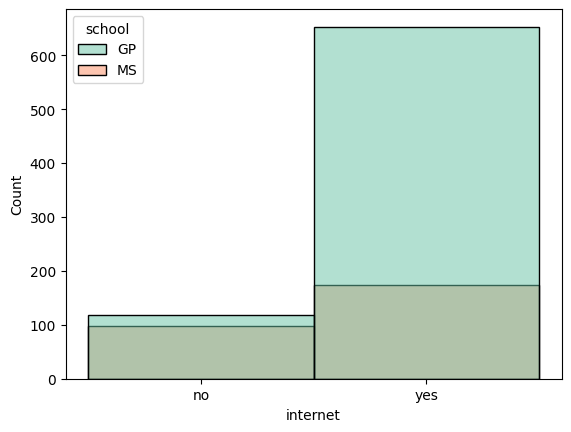

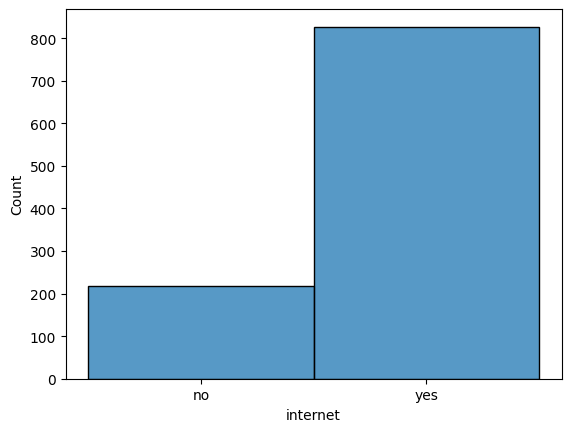

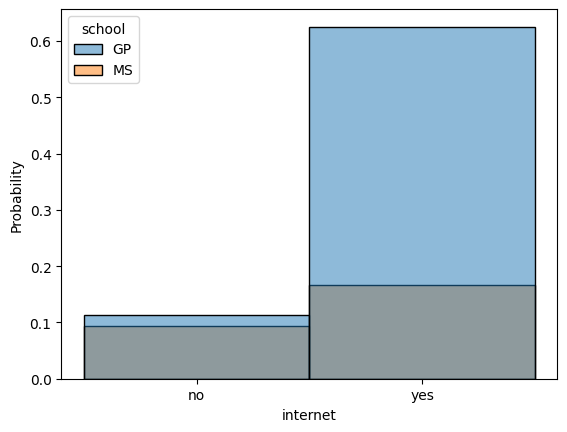

In [ ]:
sns.histplot(data=df, x='internet', stat='count', hue='school', palette=sns.color_palette("Set2"))
plt.show()
sns.histplot(data=df, x='internet', stat='count', palette=sns.color_palette("tab10"))
plt.show()
sns.histplot(data=df, x='internet', stat='probability',hue='school', palette=sns.color_palette("tab10"))
plt.show()

In [ ]:
df[['internet','school']].groupby('internet').value_counts()

internet  school
no        GP        119
          MS         98
yes       GP        653
          MS        174
dtype: int64

In [ ]:
119/df.shape[0]#(119+98+653+174) # probability calculated in all data record

0.11398467432950192

In [ ]:
df.shape[0]

1044

Next we have a Grid histogram plot with respect of `School` feature.

**Note:** Be aware About difference of `Density` and `Probability` parameters of `stat` argument

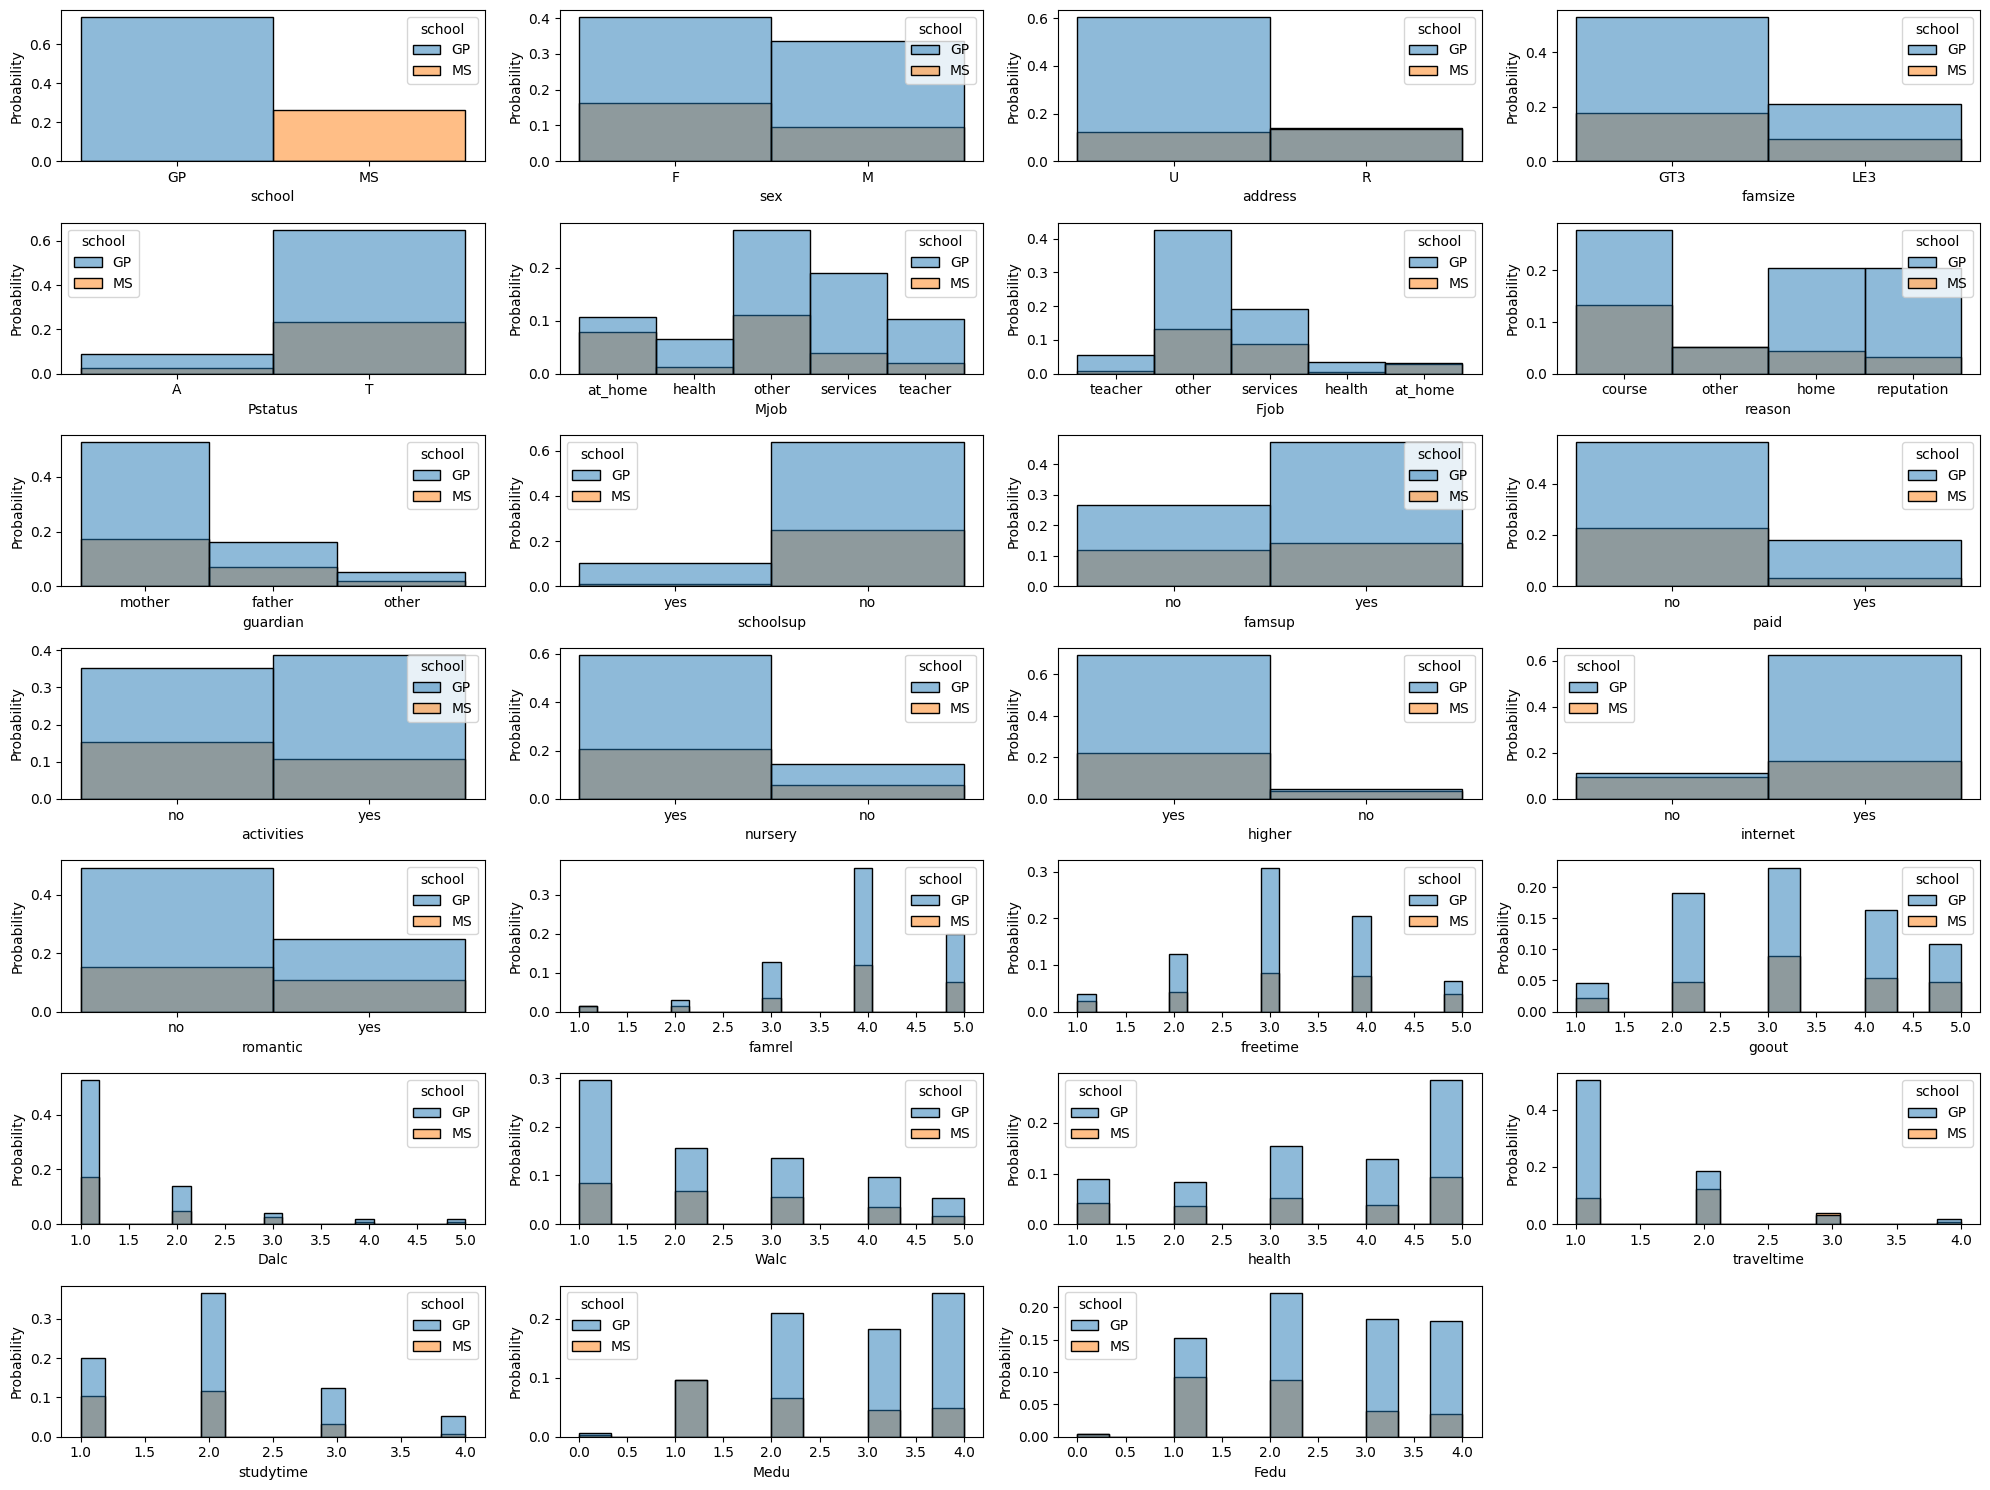

In [ ]:
fig = plt.figure(figsize=(20,15))

for index,i in enumerate(new_obj):

  ax = fig.add_subplot(7,4,index+1)
  sns.histplot(data=df, x=i, stat='probability', hue='school', ax=ax)
  plt.tight_layout()

Here we can mentioned some points:  
> 1. `GP` school has most of students.
> 2. in `Address` feature we can see some interesting and vague thing in `R` type of `Address` that needed further investigation just like `other` in `reason` feature  .
> 3. We can see somthing like previous note in `Fjob` feature in `at_home` type.
> 4. We can see in `GP` school students with extra educational support is much more higher than `MS`, also extra paid classes within the course subject `(paid)`.
> 5. we can see from distribution of `activities`, most of students of `GP` school want extra-curricular activities but in `MS` school the don't.  

Next we can plot `mean of G3 score` with respect of `unique values` of each `numerical columns`.

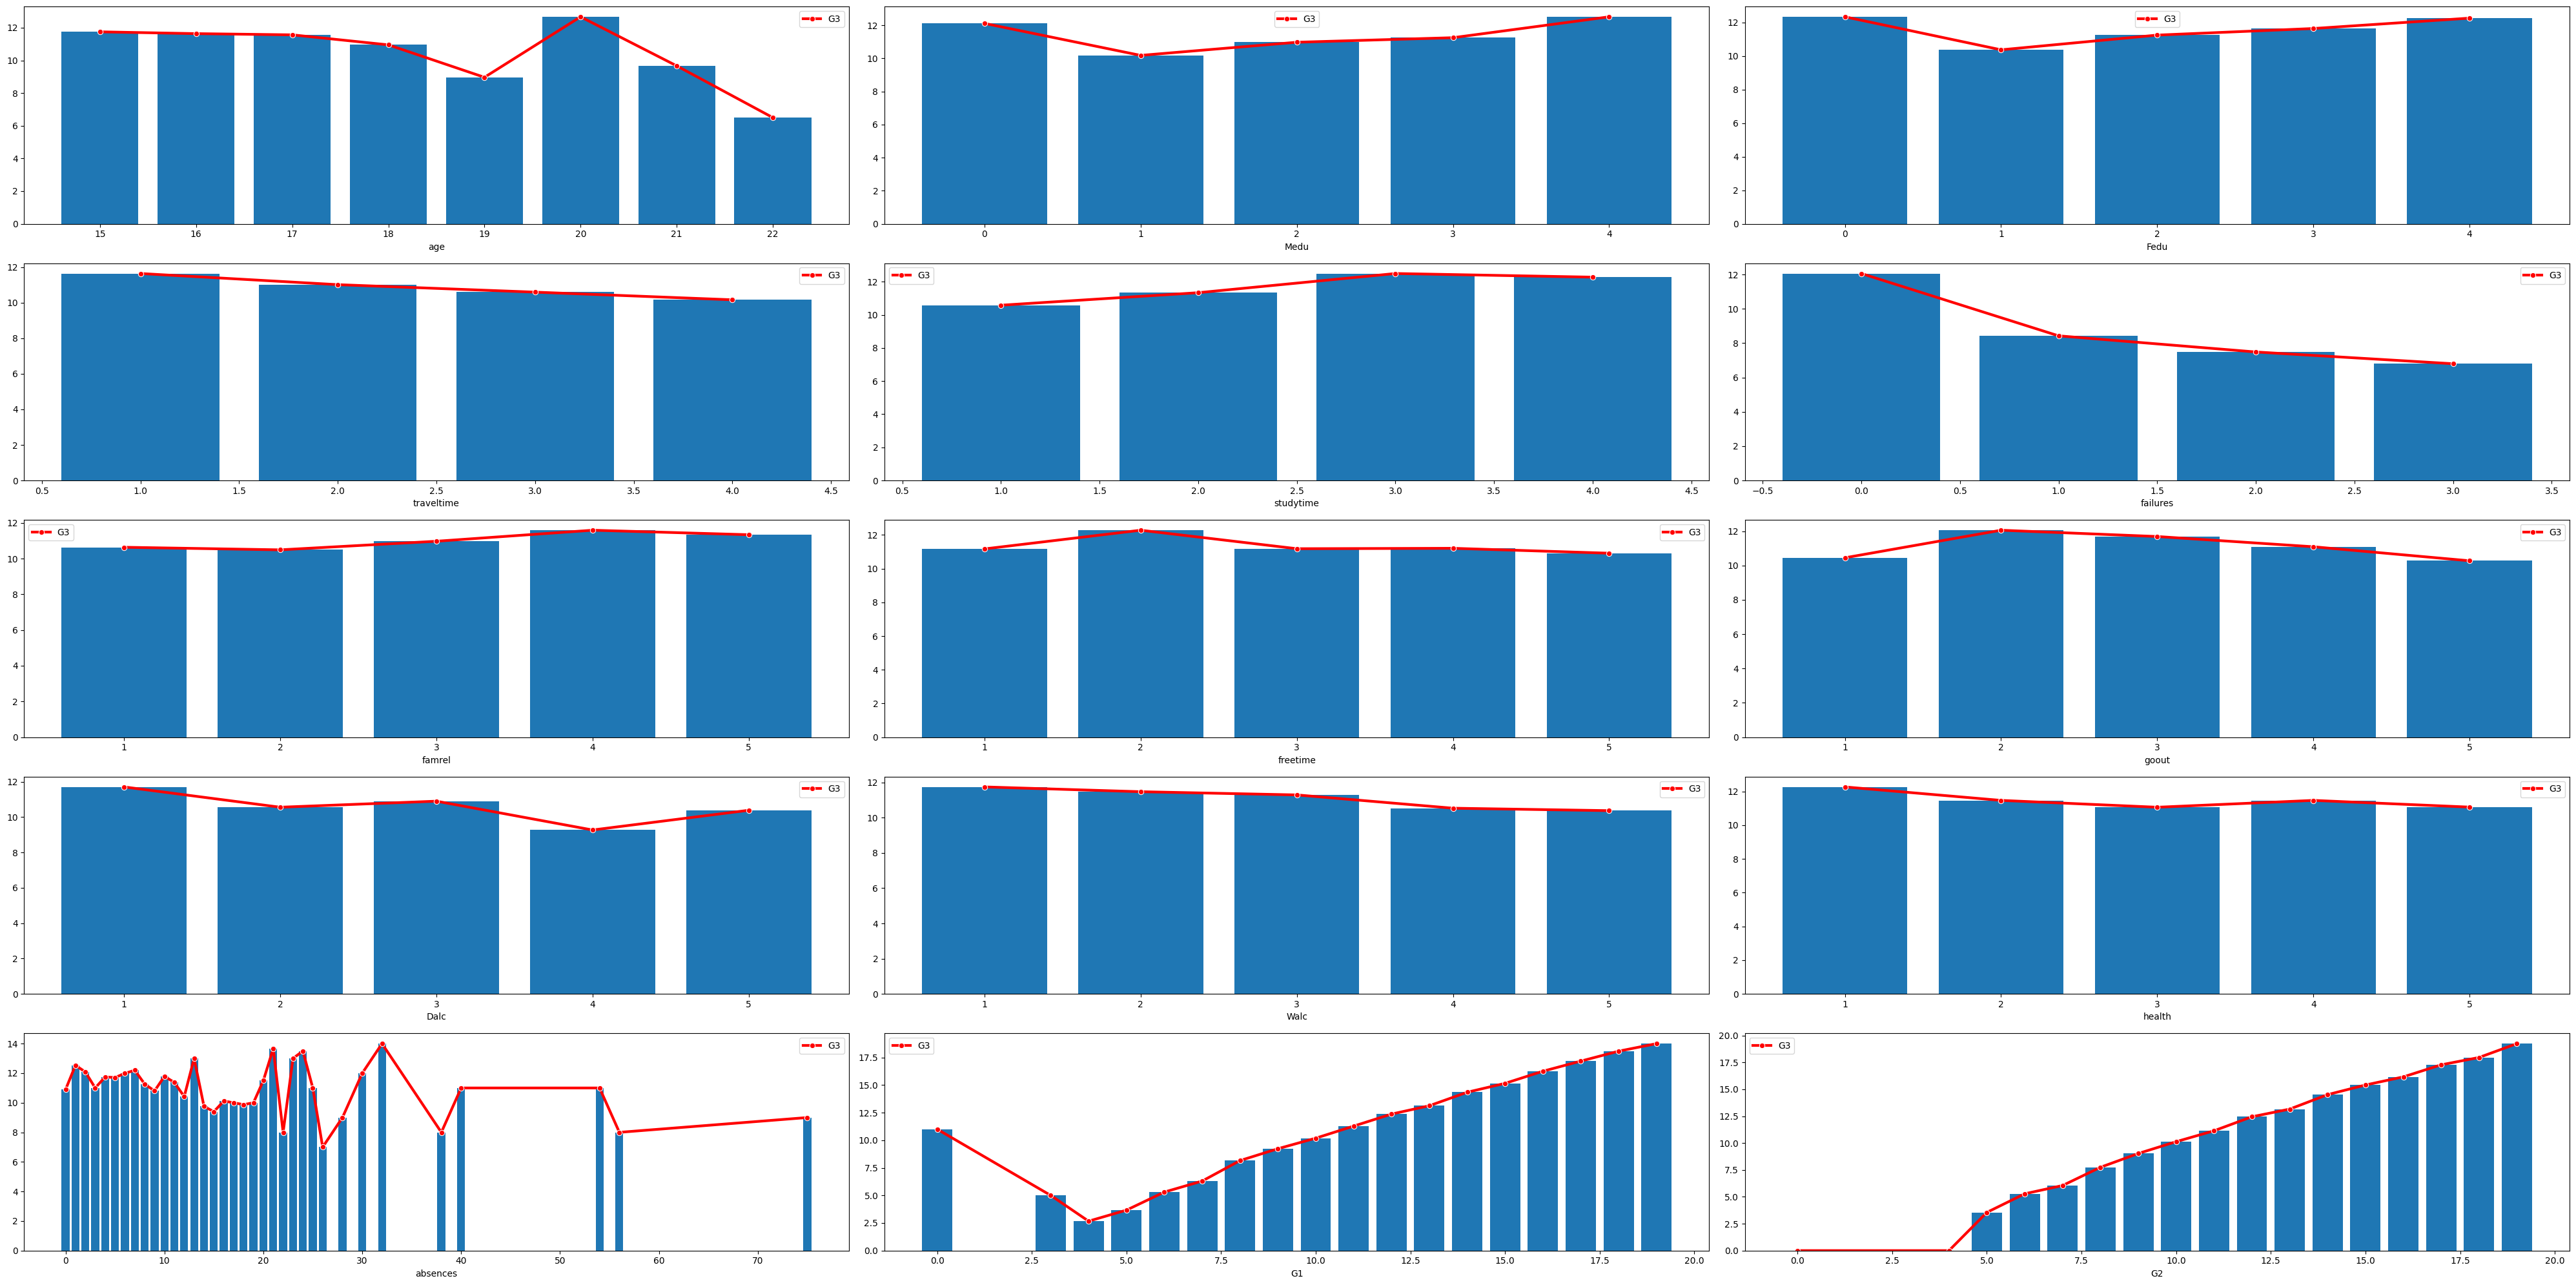

In [ ]:
plt.figure(figsize=(40,20))
for index,i in enumerate(num_columns):
    if i == 'G3':
        continue
    a = df[['G3', i]].groupby(i).mean()
    axis = plt.subplot(5,3,index+1)
    axis.bar(x=a.index, height=a.G3)
    sns.lineplot(a, marker='o', palette=['red'], ax=plt.subplot(5,3,index+1), linewidth=3)


plt.tight_layout()

Here we can see significant difference in scores(G3):  
1. students with age `22` have lowest and age `20` have highest mean of score.
2. students with `Father education` type `1` and `Mother education` type `1` have lowest mean of score.
3. there is `no` difference between mean of score of student with `studytime` 3 or 4.  
4. students with `0` failure have higher mean of score.
5. students with `workday alcohol consumption type 4` have the lowest mean of score.
6. students with `26` number of school absences have lowest mean of score and on the other hand students with `32` number of school absences have highest mean of score
7. we can see in `G1` we have mean of 10-11.5 for `score 0 `that it may be consider as outlier


Next we can see our `First hypothesis` was wrong and mean of scores in `GP school` is not `equal` to `MS school`

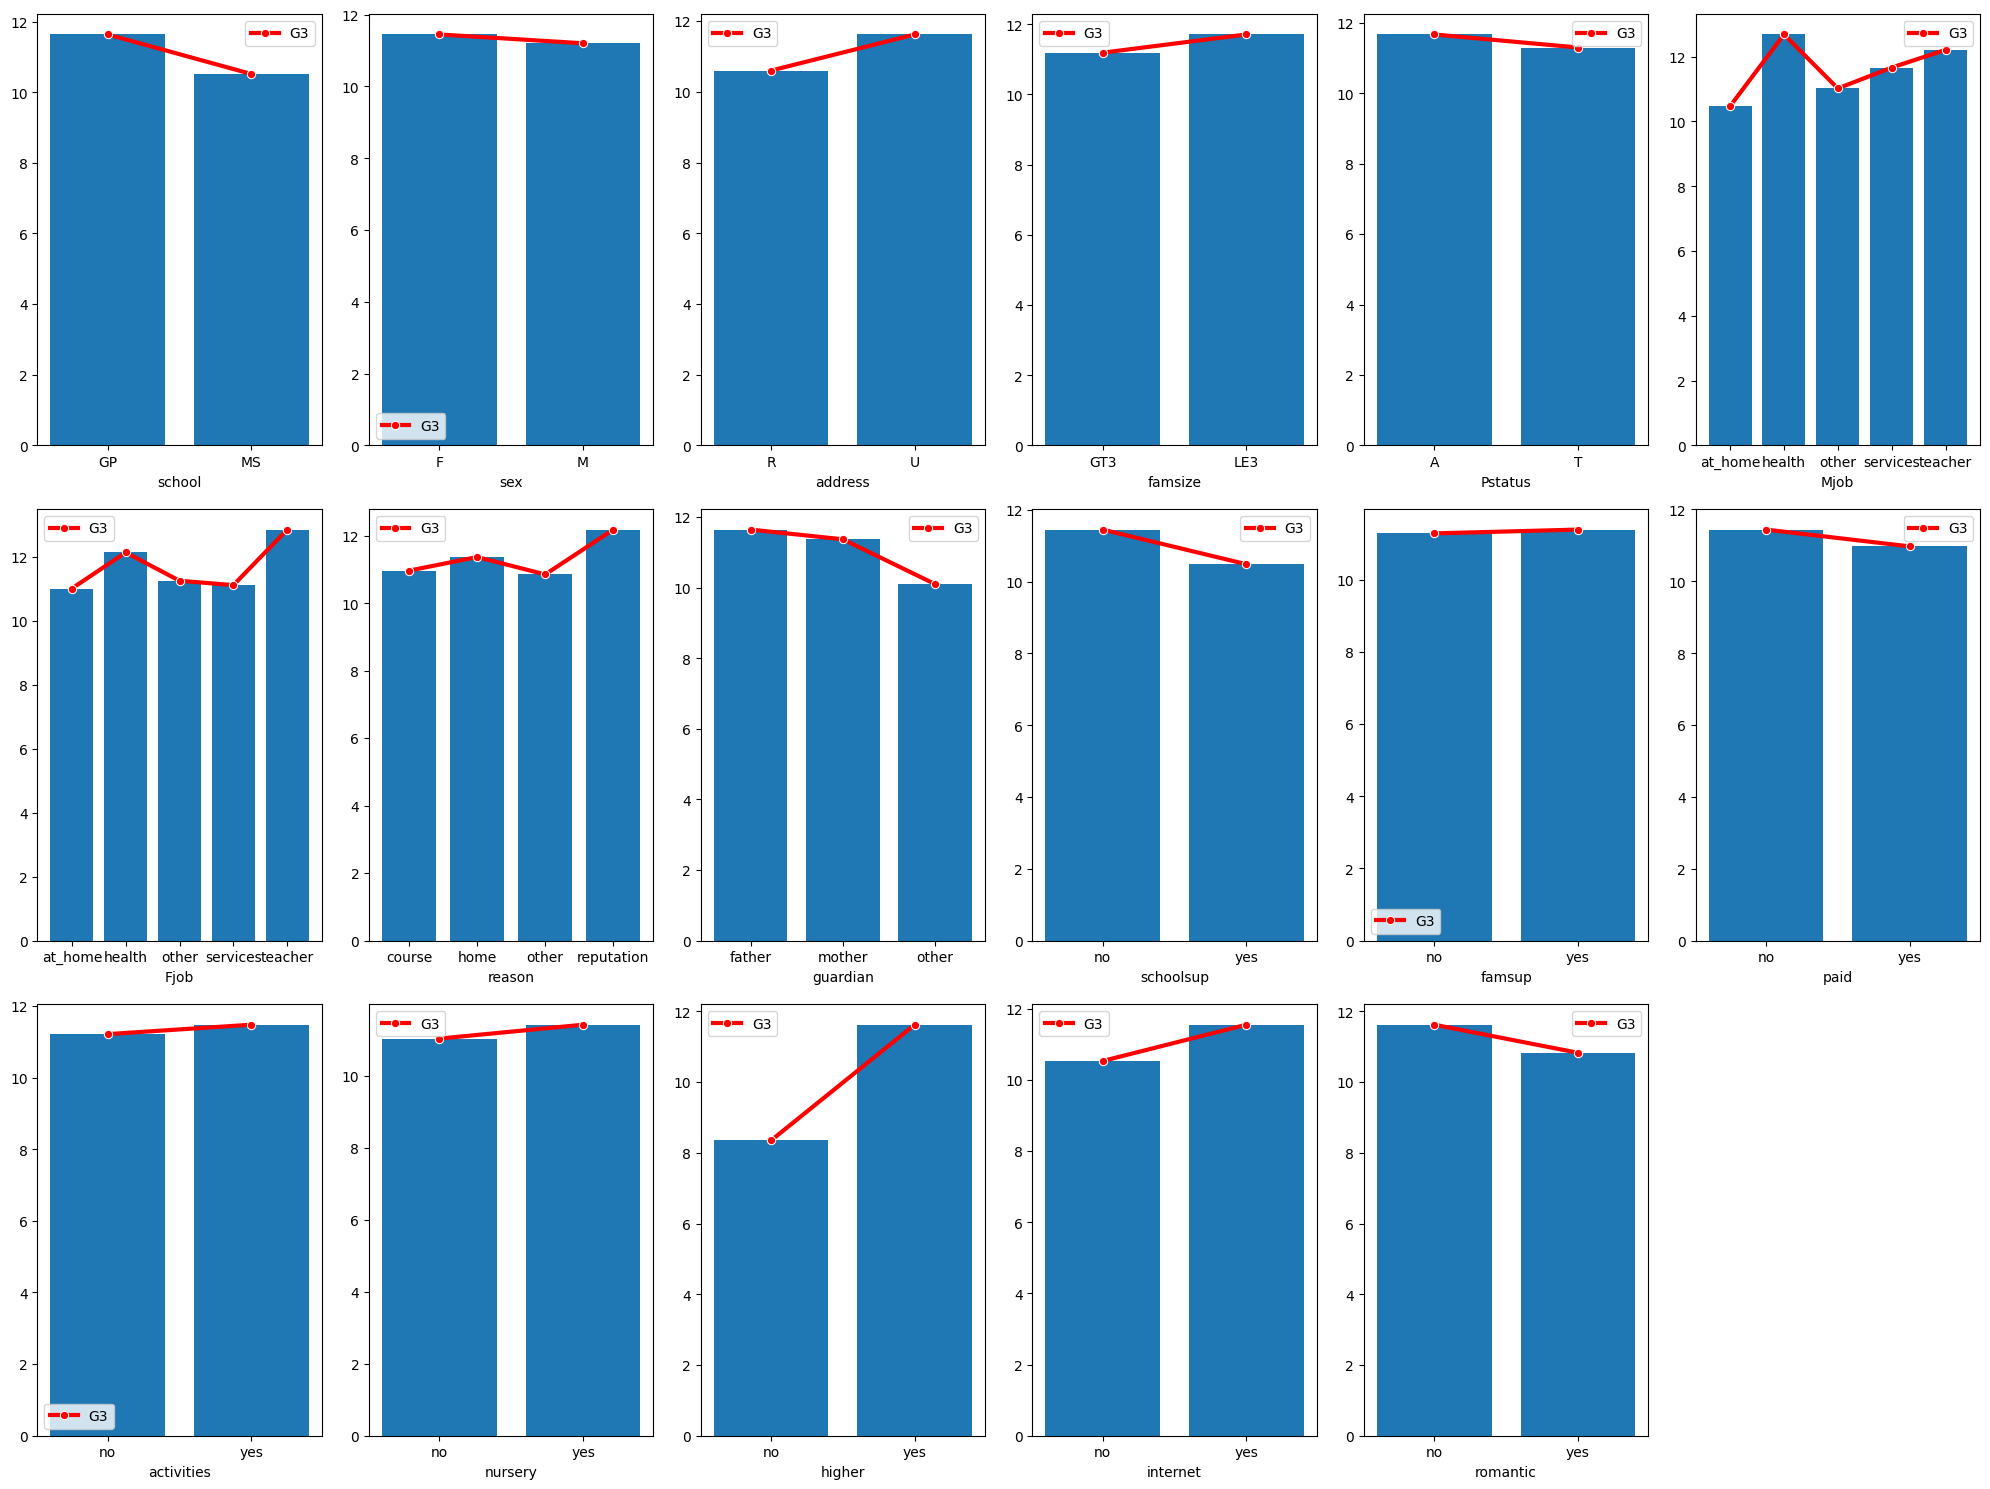

In [ ]:
plt.figure(figsize=(20,15))
for index,i in enumerate(obj_columns):
    a = df[['G3', i]].groupby(i).mean()
    axis = plt.subplot(3,6,index+1)
    axis.bar(x=a.index, height=a.G3)
    sns.lineplot(a, marker='o', palette=['red'], ax=axis, linewidth=3)

plt.tight_layout()

> score = G3  

We can see significant different in `Mjob`, `Fjob`, `reason`, `higher`, `guardian` columns.  
* student who they want to `continue their education` to higher level have higher mean score.
* students group with `no` mother and father as gurdian has lower mean score.
* students group that have `health` and `teacher` as the job of their mother or father have higher mean score.
* students group that chosen their school based on `reputation` have higher mean of score. (wierd thing !! XD)

# Outliers detection

In [ ]:
df.tail()

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
1039     MS   M   20       U     LE3       A     2     2  services  services   
1040     MS   M   17       U     LE3       T     3     1  services  services   
1041     MS   M   21       R     GT3       T     1     1     other     other   
1042     MS   M   18       R     LE3       T     3     2  services     other   
1043     MS   M   19       U     LE3       T     1     1     other   at_home   

      ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
1039  ...      5        5      4     4     5      4       11   9   9   9  
1040  ...      2        4      5     3     4      2        3  14  16  16  
1041  ...      5        5      3     3     3      3        3  10   8   7  
1042  ...      4        4      1     3     4      5        0  11  12  10  
1043  ...      3        2      3     3     3      5        5   8   9   9  

[5 rows x 33 columns]

<Axes: title={'center': 'G3'}, xlabel='[school]'>

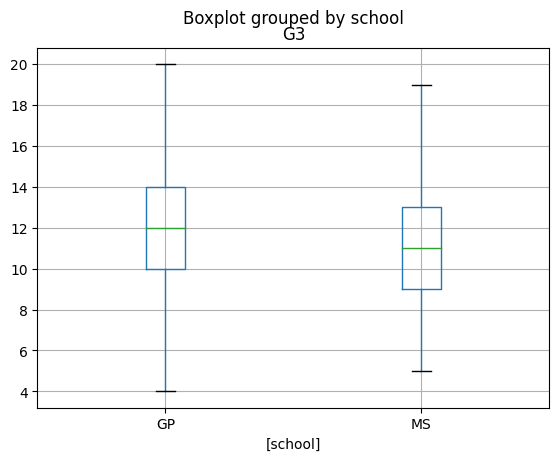

In [ ]:
df[['G3', 'school']].boxplot(by='school')

<Axes: >

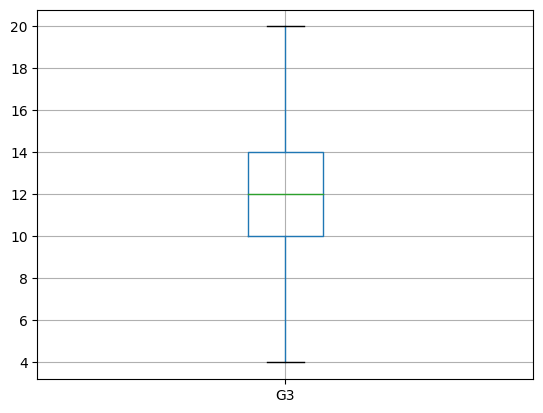

In [ ]:
df[['G3']].boxplot() #G3 box plot

We can see we have some outliers based on box plot that are `zero` and `near zero`.  
Lets see what they are...

In [ ]:
mask = df.G3 < 2.5
df[mask].G3.value_counts()

Series([], Name: count, dtype: int64)

we have **53** scores `0` and **1** score `1`.  
Obviously these score will bias our model and we should remove them.

In [ ]:
df.drop(index=df[mask].G3.index, inplace=True)

<Axes: >

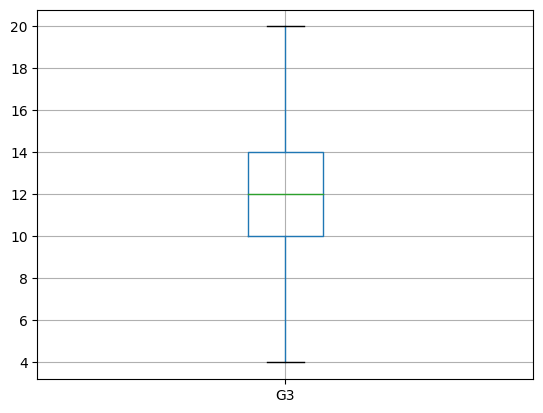

In [ ]:
df[['G3']].boxplot()

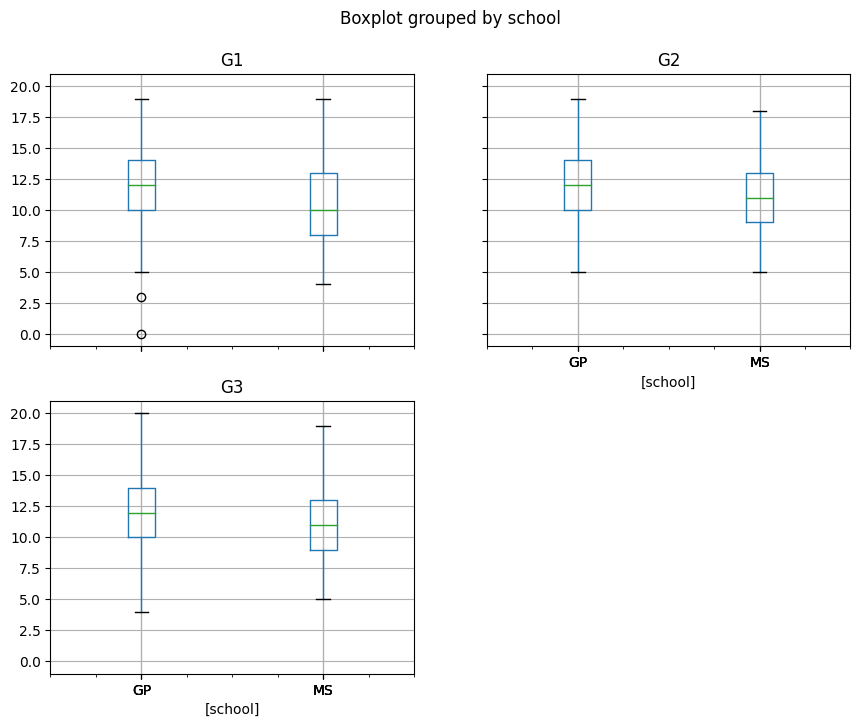

In [ ]:
# Create a figure and axes with specific size
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the data on the created axes
df[['G3', 'G2', 'G1', 'school']].boxplot(by='school', ax=ax)

# Show the plot
plt.show()



We can see some `outlier` based on boxplot on `G1` score with respect of `school` feature

In [ ]:
mask = df.G1 < 4
df[mask].G1.value_counts()

G1
0    1
3    1
Name: count, dtype: int64

We have `0` and `3` as outliers in `G1` score of `GP` school

In [ ]:
df.drop(index=df[mask].G1.index, inplace=True)

Lets check again

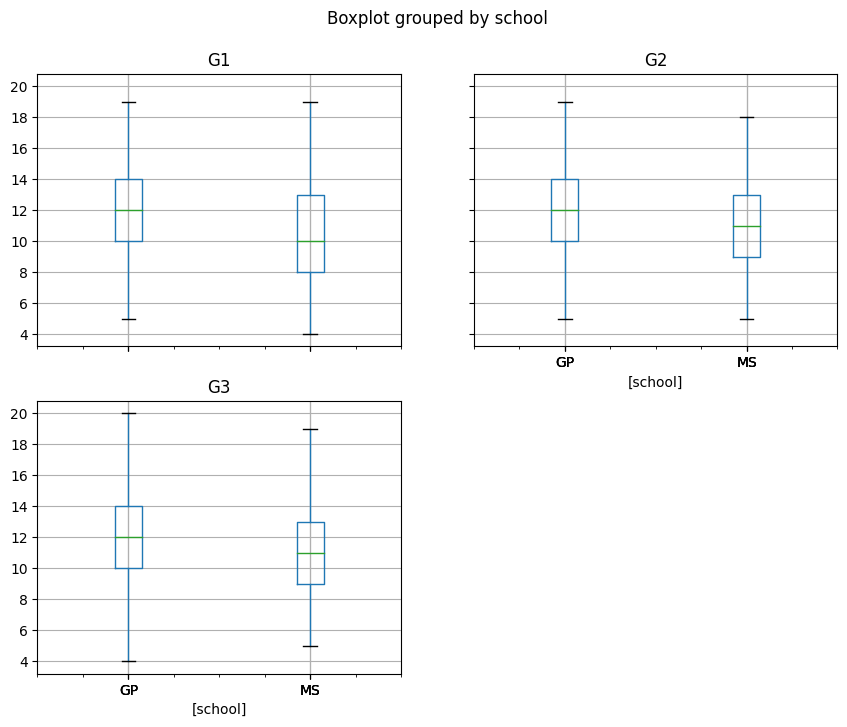

In [ ]:
# Create a figure and axes with specific size
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the data on the created axes
df[['G3', 'G2', 'G1', 'school']].boxplot(by='school', ax=ax)

# Show the plot
plt.show()



Now they have approximately normal distribution shape

<Axes: ylabel='Probability'>

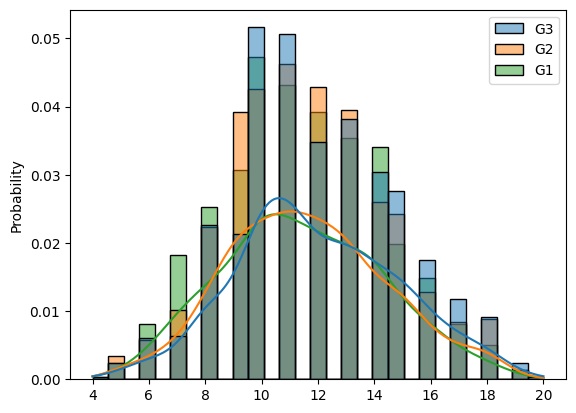

In [ ]:
sns.histplot(df[['G3', 'G2', 'G1']], stat='probability', kde=True)

We can see some right skewed in the shapes but it is better than previous.  

**Note**: We also removed outliers that detected based on scores and shchool features

# Feature Engineering

Descriptive Analysis for object variables

In [ ]:
des_obj = df.select_dtypes(include='object').describe()
des_obj.iloc[3, ] = des_obj.iloc[3, ] / df.shape[0]
des_obj.index = ['count', 'unique', 'top', 'relative freq']
des_obj

school       sex   address   famsize   Pstatus      Mjob  \
count               988       988       988       988       988       988   
unique                2         2         2         2         2         5   
top                  GP         F         U       GT3         T     other   
relative freq  0.742915  0.566802  0.732794  0.700405  0.882591  0.379555   

                   Fjob    reason  guardian schoolsup    famsup      paid  \
count               988       988       988       988       988       988   
unique                5         4         3         2         2         2   
top               other    course    mother        no       yes        no   
relative freq  0.561741  0.407895  0.698381  0.882591  0.618421  0.786437   

              activities   nursery    higher  internet romantic  
count                988       988       988       988      988  
unique                 2         2         2         2        2  
top                   no       yes       yes       yes       no  
relative freq   0.507085  0.800607  0.921053  0.796559  0.65587

based on what we see :
* `74 percent` students chosen in `GP` school
* parents of `88 percent` of students `live together`
* approximately `70 percent` of students have their `mother` as their guardian
* family of `61 percents` of students support them educationaly
* `80 percent` of students have internet

Descriptive analysis for numeric variables

In [ ]:
df.select_dtypes(exclude='object').describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  988.000000  988.000000  988.000000  988.000000  988.000000  988.000000   
mean    16.694332    2.617409    2.399798    1.516194    1.977733    0.229757   
std      1.233478    1.126894    1.100373    0.730533    0.834605    0.614619   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.750000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  988.000000  988.000000  988.000000  988.000000  988.000000  988.000000   
mean     3.940283    3.197368    3.152834    1.492915    2.291498    3.534413   
std      0.925534    1.035594    1.137873    0.915337    1.286690    1.431952   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    2.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  988.000000  988.000000  988.000000  988.000000  
mean     4.674089   11.439271   11.620445   11.967611  
std      6.293325    2.864264    2.827113    2.887096  
min      0.000000    4.000000    5.000000    4.000000  
25%      0.000000    9.000000   10.000000   10.000000  
50%      2.000000   11.000000   11.000000   12.000000  
75%      6.000000   13.250000   13.000000   14.000000  
max     75.000000   19.000000   19.000000   20.000000

we can see G1, G2, G3 are simmilar to each other and we probably need some scaling for numeric features.

Now we focused on numeric variables that are not `encoded version` of `Categorical variable`

In [ ]:
df[list(set(num_columns) - set(new_obj))].describe().T

count       mean       std   min   25%   50%    75%   max
G3        988.0  11.967611  2.887096   4.0  10.0  12.0  14.00  20.0
age       988.0  16.694332  1.233478  15.0  16.0  17.0  18.00  22.0
G1        988.0  11.439271  2.864264   4.0   9.0  11.0  13.25  19.0
G2        988.0  11.620445  2.827113   5.0  10.0  11.0  13.00  19.0
absences  988.0   4.674089  6.293325   0.0   0.0   2.0   6.00  75.0
failures  988.0   0.229757  0.614619   0.0   0.0   0.0   0.00   3.0

Let's plot **`Pearson Correlation`** matirx to find out how variance of data are related to each other

<Axes: >

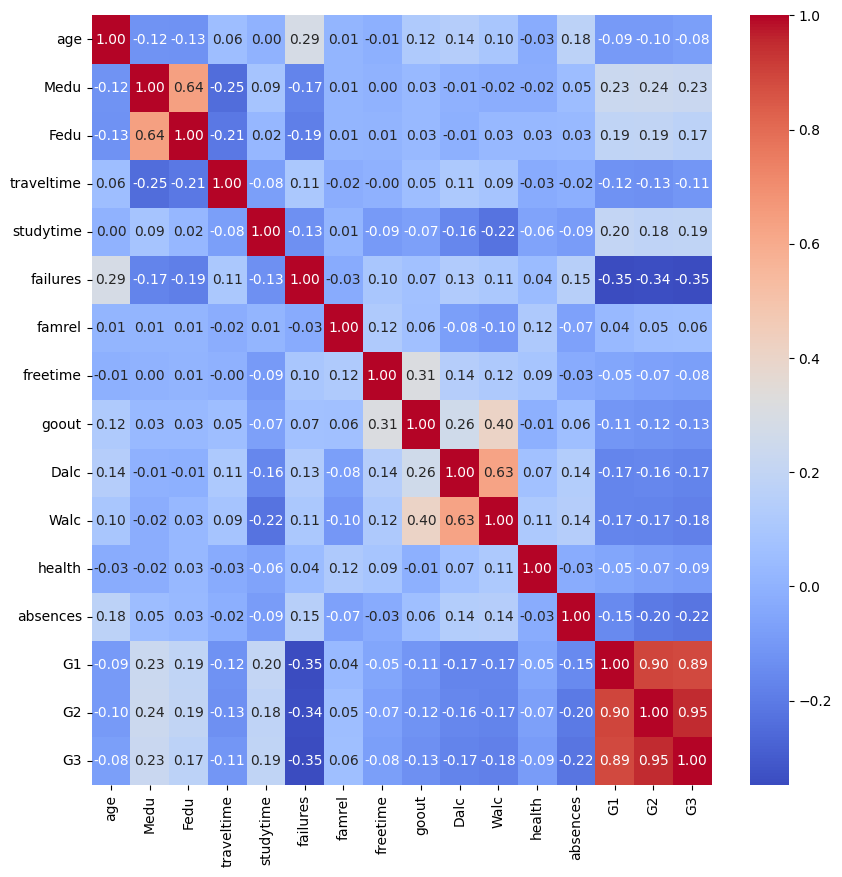

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='0.2f')

We can see there is good relationship between:
* `G1`,`G2`,`G3`
* `Dalc`,`Walc`
* `G1`,`G2`,`G3` and `failures`

We can see the `multicolinearity` in our dataset.  


---

And Aslo we can see some positive and negative correlation for example:  

Positive ones:
* `Fedu`, `Medu`, `Famrel`, `Studytime`  

Negative ones:  
* `Walc`, `Dalc`, `goout`, `absence`

**Note**: As you can see here in this Corelation it will be calculated based on variation of data in each group, so we the relationship is actualy is more complex than what we calculate here, But it can give us a good point of view.

draw a pair plot will help us to better visualize data relation and distribution.  
> We plot it with respect of `school` feature.

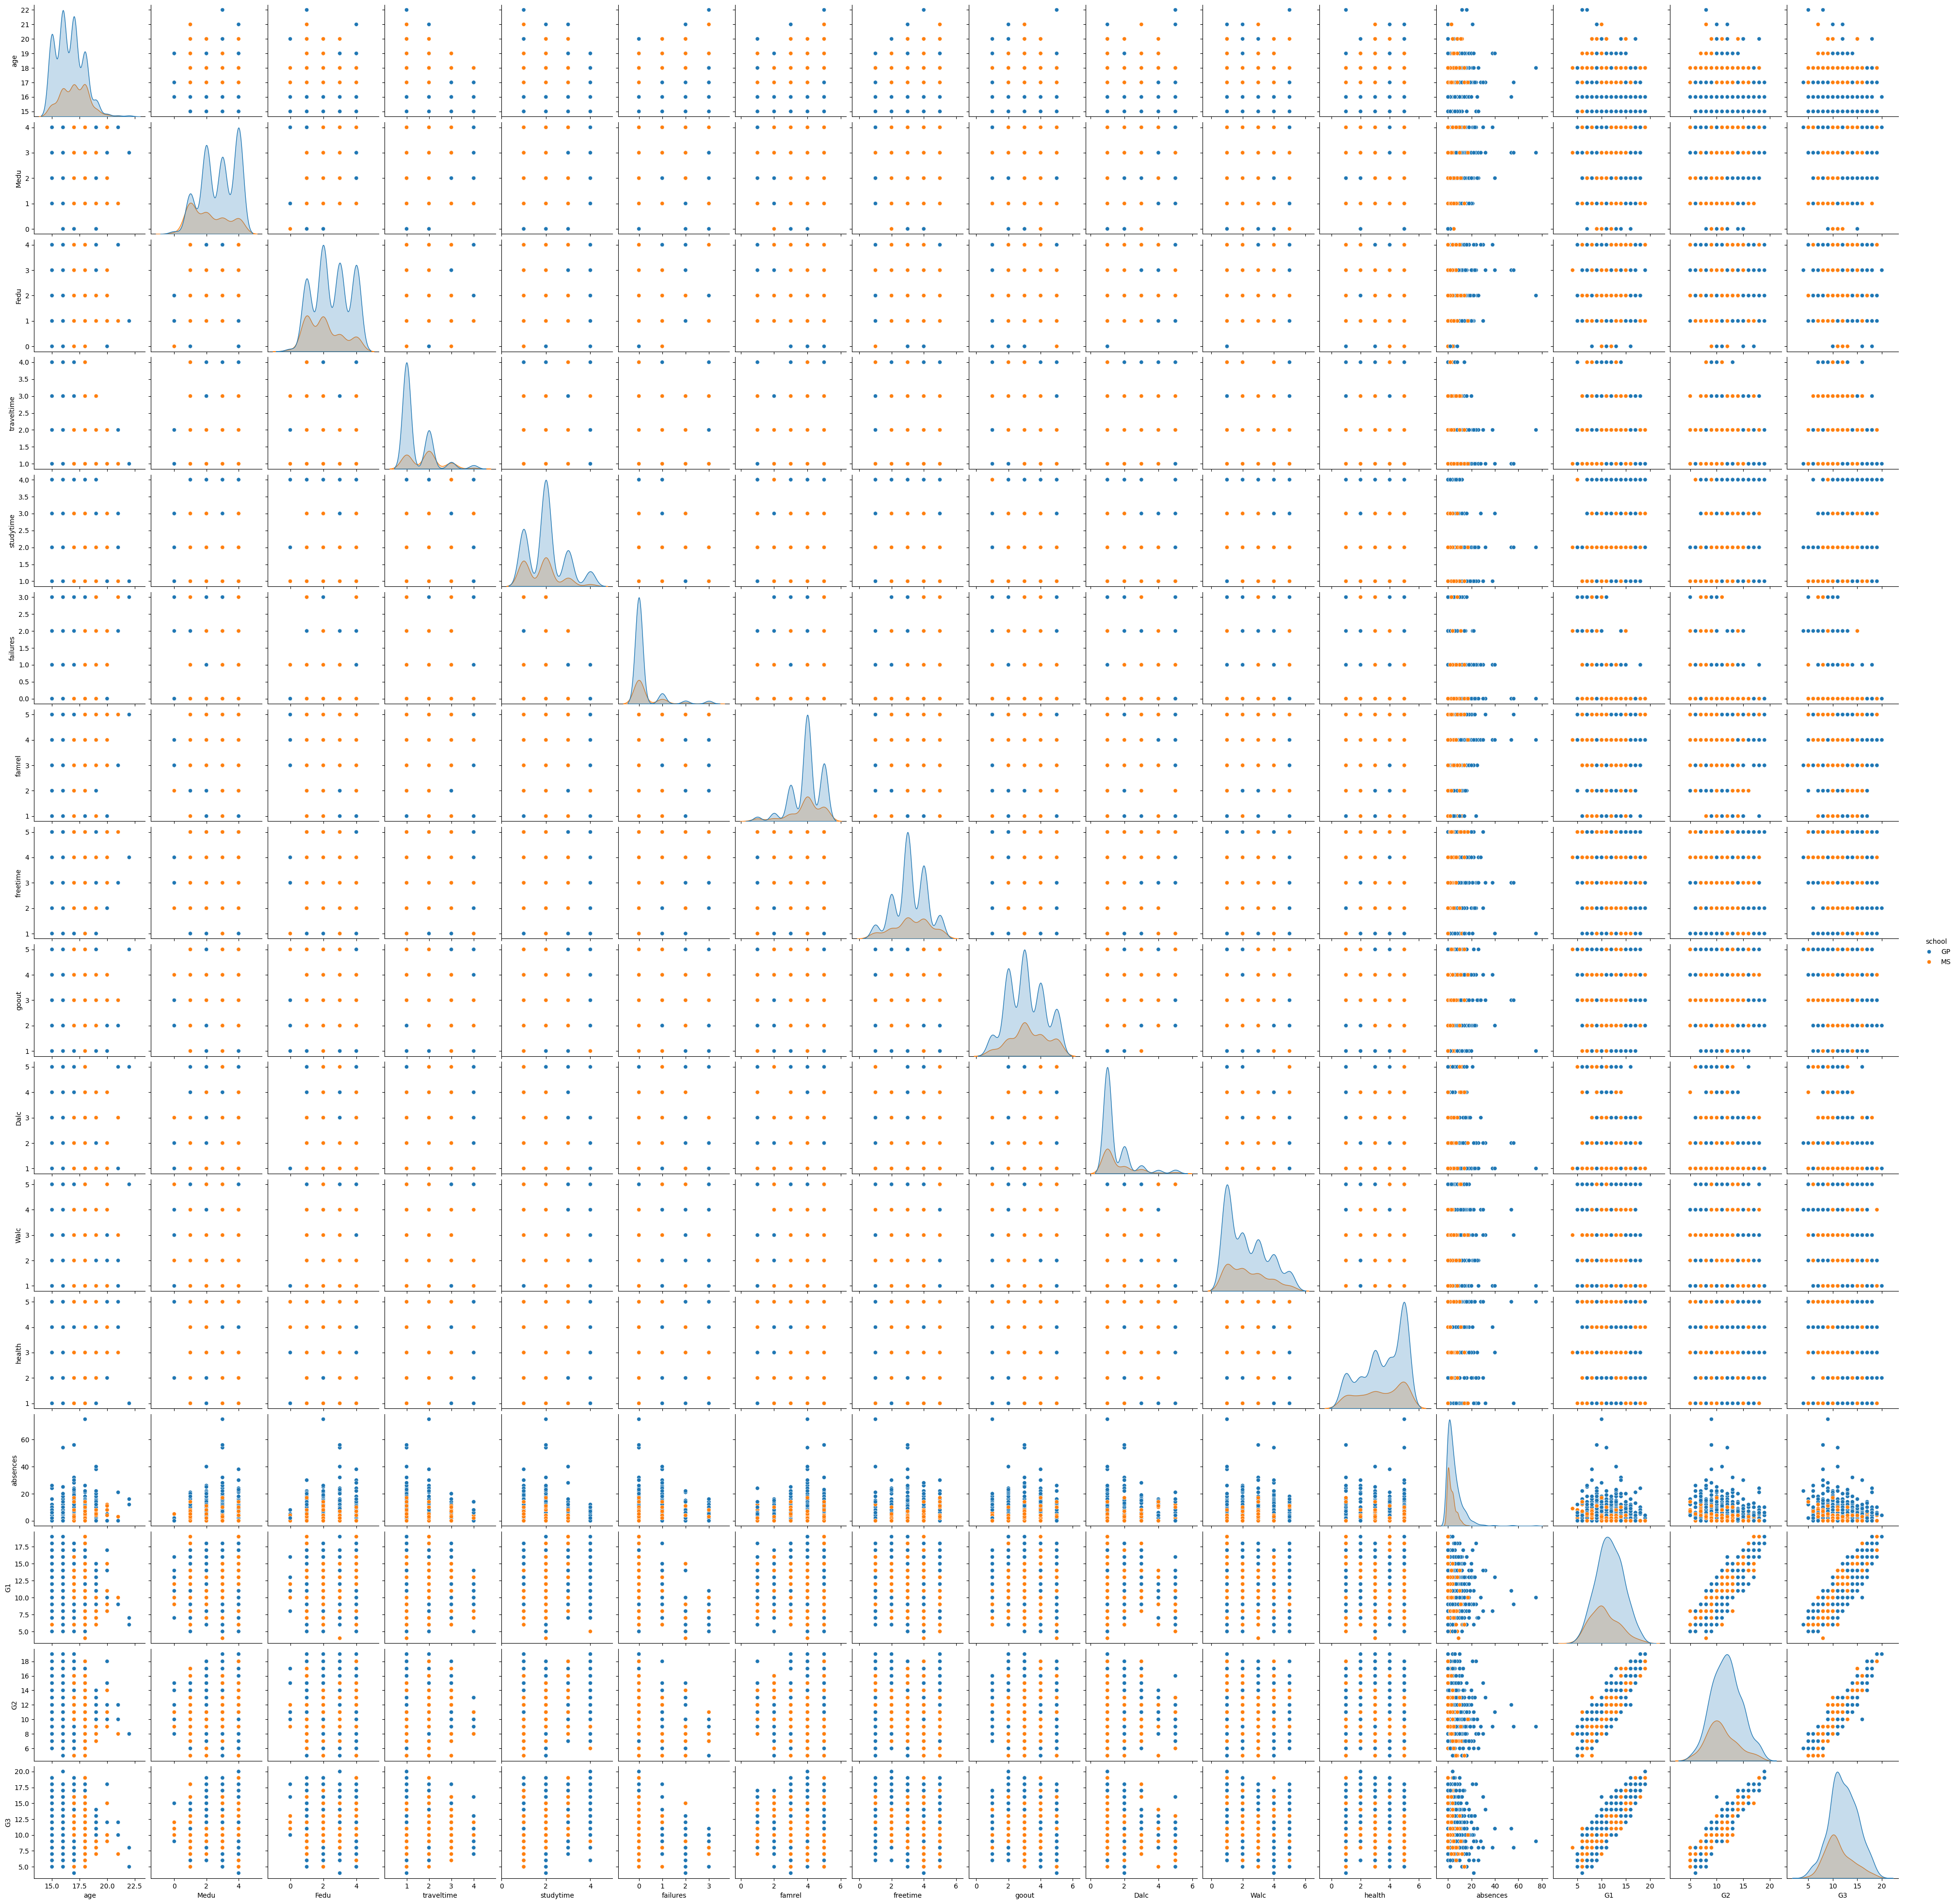

In [ ]:
#pair plot
sns.pairplot(df, hue='school')

**`Clasified G3`**

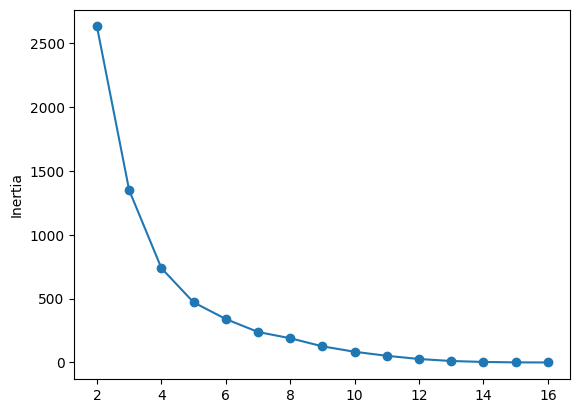

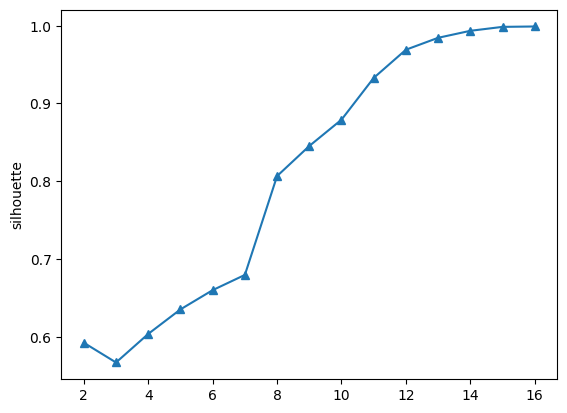

In [ ]:
inertia, silhouette = [], []

# Number of clusters
for k in range(2,17):
  # Create a KMeans instance with k clusters
  kmeans = KMeans(n_clusters=k, random_state=0)

  # Fit the model
  kmeans.fit(df[['G1']])

  # Cluster assignments for each data point
  assignments = kmeans.labels_

  # Inertia
  inertia.append(kmeans.inertia_)

  # Silhouette Score
  silhouette.append(silhouette_score(df[['G1']], kmeans.labels_))


plt.plot(range(2,17), inertia, marker='o')
plt.ylabel('Inertia')
plt.show()
plt.plot(range(2,17), silhouette, marker='^')
plt.ylabel('silhouette')
plt.show()


Base on these two results **9 clusters** is a good choise
and also we want use both `G1` and `G2` lets visualize them also

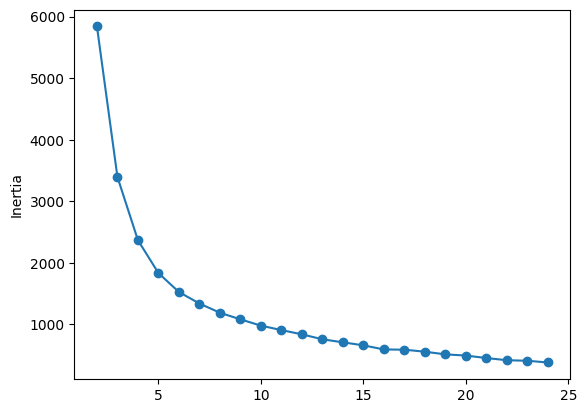

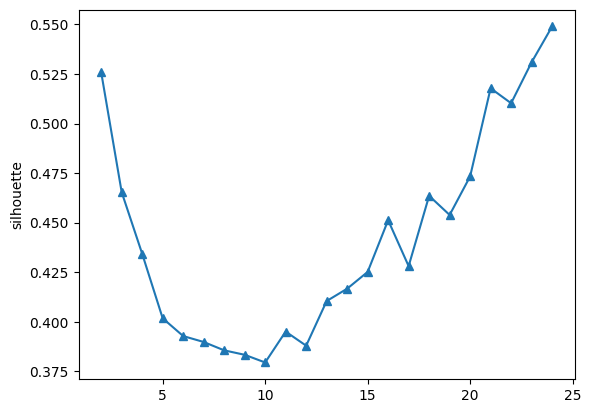

In [ ]:
inertia, silhouette = [], []

# Number of clusters
for k in range(2,25):
  # Create a KMeans instance with k clusters
  kmeans = KMeans(n_clusters=k, random_state=0)

  # Fit the model
  kmeans.fit(df[['G1','G2']])

  # Cluster assignments for each data point
  assignments = kmeans.labels_

  # Inertia
  inertia.append(kmeans.inertia_)

  # Silhouette Score
  silhouette.append(silhouette_score(df[['G1','G2']], kmeans.labels_))


plt.plot(range(2,25), inertia, marker='o')
plt.ylabel('Inertia')
plt.show()
plt.plot(range(2,25), silhouette, marker='^')
plt.ylabel('silhouette')
plt.show()


We can see Inertia Decrease smoothly but silhouette decreased and increased.  
**Note:** By recursive elimination feature (REF) experiment i found out that 9 cluster will be better

We fit kmeans and add **`labels_fitted`** to our dataset

In [ ]:
k = 9
# Create a KMeans instance with k clusters
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the model
kmeans.fit(df[['G1', 'G2']]) # or G1
labels_fitted = kmeans.labels_
df['n_clusters'] = labels_fitted

> **Future approche**: We can change our target from Regression Form to Classification Form by classifing G3 into **bad, normal, good**.

**`Pre_score_mean Feature`**.  
we want to create a feature that is combination G1 and G2

In [ ]:
df['Pre_score_mean'] = df[['G1', 'G2']].mean(axis=1)

In [ ]:
df['Total Score'] = df['G1'] + df['G2']

**Note:** we can add more Features here i encourage you to do that...

**`Skewness`**  
We shoud change skewness of our skewed fearures

In [ ]:
skewness_overall = df.skew(numeric_only=True).sort_values(ascending=False)

# filter skewed features
skewness_overall[(skewness_overall > 0.5) | (skewness_overall < -0.5)]

absences      3.703773
failures      3.043485
Dalc          2.173436
traveltime    1.396806
studytime     0.659994
Walc          0.614111
famrel       -1.064525
dtype: float64

In [ ]:
skewed_features = skewness_overall[(skewness_overall > 0.5) | (skewness_overall < -0.5)].index
skewed_features

Index(['absences', 'failures', 'Dalc', 'traveltime', 'studytime', 'Walc',
       'famrel'],
      dtype='object')

Lets apply some Transformation on our features to make them less skewed

In [ ]:
np.sqrt(df['absences']).skew()

0.5357591431958711

We can not use `log` or `boxcox` if we have records that are`negative` or `zero`.  
We can solve this challange a little by adding constant to each values

In [ ]:
df[skewed_features].min()

absences      0
failures      0
Dalc          1
traveltime    1
studytime     1
Walc          1
famrel        1
dtype: int64

We have Two features that contain `Zero`, We solve it by adding constant one to each values

In [ ]:
np.log(df['absences'] + 1).skew(), np.log(df['failures'] + 1).skew()

(0.08299310637665615, 2.390487339613232)

In [ ]:
for i in skewed_features:
  if i in ['absences', 'failures']:
    df[i] = np.log(df[i] + 1)
    print(f'skewness of {i} : ', df[i].skew())
    continue
  df[i] = np.log(df[i])
  print(f'skewness of {i} : ', df[i].skew())

skewness of absences :  0.08299310637665615
skewness of failures :  2.390487339613232
skewness of Dalc :  1.3916259686809096
skewness of traveltime :  0.7961516353914099
skewness of studytime :  -0.12985592919202626
skewness of Walc :  0.06708062812981605
skewness of famrel :  -2.3884330491321575


As you can see here we increase skewness of `famrel`, but we let it be for now.

> **Note**: We saw that we had `multicolinearity` it will affect ou regression model therefore We can use `dimension reduction techniques` to reduce `dimension` and `multicolinearity`.

In [ ]:
df.head()

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   

   ...      Dalc      Walc  health  absences  G1  G2  G3 n_clusters  \
1  ...  0.000000  0.000000       3  1.098612   9  11  11          5   
2  ...  0.693147  1.098612       3  1.945910  12  13  12          0   
3  ...  0.000000  0.000000       5  0.000000  14  14  14          2   
4  ...  0.000000  0.693147       5  0.000000  11  13  13          0   
5  ...  0.000000  0.693147       5  1.945910  12  12  13          0   

  Pre_score_mean Total Score  
1           10.0          20  
2           12.5          25  
3           14.0          28  
4           12.0          24  
5           12.0          24  

[5 rows x 36 columns]

In [ ]:
df.isnull().sum().sum()

0

We do not have any `NaN` values

# PCA, Deep Learning Encoder  
In this Part we `perform PCA` to reduce **dimension** and **multicolinearity**.  
> Also we in **Feuture version** of notebook we Implement ```Deep Learning Encoder``` to **create new features** and **denoising dataset**  

For PCA we need to first Scale data and then Perform  PCA Transformation

I have some Categorical variable and i need to Encode them.

In [ ]:
encoded_df = pd.get_dummies(df.drop(columns=['G3'])) #= we do not have ordinal categorical variables, and also we drop target variable

In [ ]:
pca_scaler = StandardScaler()
df_scaled = pca_scaler.fit_transform(encoded_df)

In [ ]:
df_scaled.shape

(988, 61)

In [ ]:
pca_transformation = PCA(n_components=0.99, random_state=46)
df_pca = pca_transformation.fit_transform(df_scaled)

In [ ]:
df_pca = pd.DataFrame(df_pca, columns=pca_transformation.get_feature_names_out())

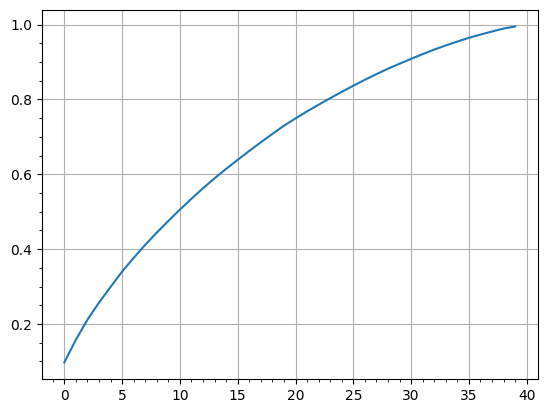

In [ ]:
plt.plot(np.cumsum(pca_transformation.explained_variance_ratio_))
plt.minorticks_on()
plt.grid('on')

In [ ]:
df_pca.shape

(988, 40)

In [ ]:
df_pca.corr().sum()

pca0     1.0
pca1     1.0
pca2     1.0
pca3     1.0
pca4     1.0
pca5     1.0
pca6     1.0
pca7     1.0
pca8     1.0
pca9     1.0
pca10    1.0
pca11    1.0
pca12    1.0
pca13    1.0
pca14    1.0
pca15    1.0
pca16    1.0
pca17    1.0
pca18    1.0
pca19    1.0
pca20    1.0
pca21    1.0
pca22    1.0
pca23    1.0
pca24    1.0
pca25    1.0
pca26    1.0
pca27    1.0
pca28    1.0
pca29    1.0
pca30    1.0
pca31    1.0
pca32    1.0
pca33    1.0
pca34    1.0
pca35    1.0
pca36    1.0
pca37    1.0
pca38    1.0
pca39    1.0
dtype: float64

This is show use that we have only one value is each columns that is 1.0 and other values are zero that showed we do not have `multicollinearity` now

we have approximately 95 percent explain of variation with 35 components compared to real dataset with 61 columns

Lets implement some Regression models

In [ ]:
# we create a dict to store our metrics values
metrics_dict = {}

Splitting Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_pca, df.G3, test_size=0.3, random_state=432, shuffle=True)

In [ ]:
pca_mlr = LinearRegression()
pca_mlr.fit(X_train, y_train)
score = pca_mlr.score(X_test, y_test)
mse = mean_squared_error(y_pred=pca_mlr.predict(X_test), y_true=y_test)
print(f'Mean Square Error: {mse}, R2_Score: {score}')

Mean Square Error: 0.8467568298726778, R2_Score: 0.9033789199904804


In [ ]:
CrossVal = cross_val_score(estimator=pca_mlr, X=df_pca, y=df.G3, cv=5)
CrossVal

array([0.8400025 , 0.8529301 , 0.90759042, 0.90293541, 0.89085074])

In [ ]:
CrossVal.mean(), CrossVal.std()

(0.8788618356332805, 0.027317045947099685)

In [ ]:
# store data of metrics
# or keys consist from two part like this: 'DatasetForm_Model'
metrics_dict['PCA_MLR'] = {'MSE':mse, 'RScore': score, 'Cross_Validation_STD' : CrossVal.std(), 'Cross_Validation_MEAN' : CrossVal.mean()}

In [ ]:
metrics_dict['PCA_MLR']

{'MSE': 0.8467568298726778,
 'RScore': 0.9033789199904804,
 'Cross_Validation_STD': 0.027317045947099685,
 'Cross_Validation_MEAN': 0.8788618356332805}

# Machine Learning Implementation

## Preprocessing  
Here we prepare dataset to use in Machine Learning models

In [ ]:
X_df = df.drop(columns=['G3'])
Y = df['G3']

In [ ]:
X_df.head()

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   

   ... goout      Dalc      Walc  health  absences  G1  G2 n_clusters  \
1  ...     3  0.000000  0.000000       3  1.098612   9  11          5   
2  ...     2  0.693147  1.098612       3  1.945910  12  13          0   
3  ...     2  0.000000  0.000000       5  0.000000  14  14          2   
4  ...     2  0.000000  0.693147       5  0.000000  11  13          0   
5  ...     2  0.000000  0.693147       5  1.945910  12  12          0   

  Pre_score_mean Total Score  
1           10.0          20  
2           12.5          25  
3           14.0          28  
4           12.0          24  
5           12.0          24  

[5 rows x 35 columns]

we need to change categorical variables to numeric variables

In [ ]:
X_df.select_dtypes(include="O").describe()

school  sex address famsize Pstatus   Mjob   Fjob  reason guardian  \
count     988  988     988     988     988    988    988     988      988   
unique      2    2       2       2       2      5      5       4        3   
top        GP    F       U     GT3       T  other  other  course   mother   
freq      734  560     724     692     872    375    555     403      690   

       schoolsup famsup paid activities nursery higher internet romantic  
count        988    988  988        988     988    988      988      988  
unique         2      2    2          2       2      2        2        2  
top           no    yes   no         no     yes    yes      yes       no  
freq         872    611  777        501     791    910      787      648

there is no ordinal variables therefore we use `get_dummies` or binary one hot encoder.

In [ ]:
pd.get_dummies(X_df.select_dtypes(include="O")).columns

Index(['school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no',
       'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes',
       'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no',
       'internet_yes', 'romantic_no', 'romantic_yes'],
      dtype='object')

We can see encoded columns in above cell output

In [ ]:
X = pd.get_dummies(X_df)

In [ ]:
X.shape

(988, 61)

In [ ]:
X.isnull().sum().sum(), Y.isnull().sum()

(0, 0)

We have `61` columns and `0` Null values

## Traditional Machine Learning  
In this section we implement Traditional Machine Learning

### Regreassion
Here We have Regression Algorithms

We implement `Polynomial Regression`

In [ ]:
poly_trans_2 = PolynomialFeatures(degree=2)
trans_data_2 = poly_trans_2.fit_transform(X)

In [ ]:
poly_trans_2.get_feature_names_out().shape

(1953,)

You can see after fit the `PolynomialFeatures` with degree of `2` we will have `1953` features which is too much.

---


Lets see how Regression model will performs on new features  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(trans_data_2, Y, test_size=0.3, random_state=432, shuffle=True)
poly_scaler = StandardScaler()
X_train_scaled = poly_scaler.fit_transform(X_train)
X_test_scaled = poly_scaler.transform(X_test)

In [ ]:
mlr = LinearRegression()
mlr.fit(X_train_scaled, y_train)
score = mlr.score(X=X_test_scaled, y=y_test)
mse = mean_squared_error(y_pred=mlr.predict(X_test_scaled), y_true=y_test)
print(f'Mean Square Error: {mse}, R2_Score: {score}')

Mean Square Error: 51.26708191343191, R2_Score: -4.849944929475361


In [ ]:
CrossVal = cross_val_score(estimator=mlr, X=trans_data_2, y=Y, cv=5) # The default scoring metric is typically the R² score

In [ ]:
CrossVal

array([  -4.63119336,  -23.80228707, -377.62214228,   -1.26892354,
         -0.9503811 ])

In [ ]:
metrics_dict['PolyNomial_MLR'] = {'MSE':mse, 'RScore': score, 'Cross_Validation_STD' : CrossVal.std(), 'Cross_Validation_MEAN' : CrossVal.mean()}

In [ ]:
metrics_dict['PolyNomial_MLR']

{'MSE': 51.26708191343191,
 'RScore': -4.849944929475361,
 'Cross_Validation_STD': 148.2236885856598,
 'Cross_Validation_MEAN': -81.6549854694184}

We can see it is bad score only with **two** Degree of `PolynomialFeatures` fitted to our data therefore we move on to our next model

In [ ]:
# note: We remove previous variable to manage our resources
del X_train, X_test, y_train, y_test, trans_data_2, poly_trans_2

After deleting variables, it's often helpful to run Python's garbage collector to ensure that memory is released:

In [ ]:
gc.collect()

27016

Next we imlement `Multiple Linear Regression`

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=432, shuffle=True) # we use random_state and shuffle to change order of our dataset
# therefore our model will not be affected by order of our data

In [ ]:
# standardaize and normalize
# To prevent data leakage we fit scaler on train set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

In [ ]:
mlr = LinearRegression()
mlr.fit(X_train_scaled, y_train)
score = mlr.score(X_test_scaled, y_test)
mse = mean_squared_error(y_pred=mlr.predict(X_test_scaled), y_true=y_test)
print(f'Mean Square Error: {mse}, R2_Score: {score}')

Mean Square Error: 0.7057473295508429, R2_Score: 0.9194691240869115


In [ ]:
CrossVal = cross_val_score(estimator=mlr, X=X_scaled, y=Y, cv=5)
CrossVal

array([0.85821475, 0.86584807, 0.90635454, 0.92313626, 0.92523506])

In [ ]:
metrics_dict['Crafted_MLR'] = {'MSE':mse, 'RScore': score, 'Cross_Validation_STD' : CrossVal.std(), 'Cross_Validation_MEAN' : CrossVal.mean()}

In [ ]:
metrics_dict['Crafted_MLR']

{'MSE': 0.7057473295508429,
 'RScore': 0.9194691240869115,
 'Cross_Validation_STD': 0.028407225825760378,
 'Cross_Validation_MEAN': 0.8957577358313508}

We can also visualize our Model performance using `Probability Density Function`

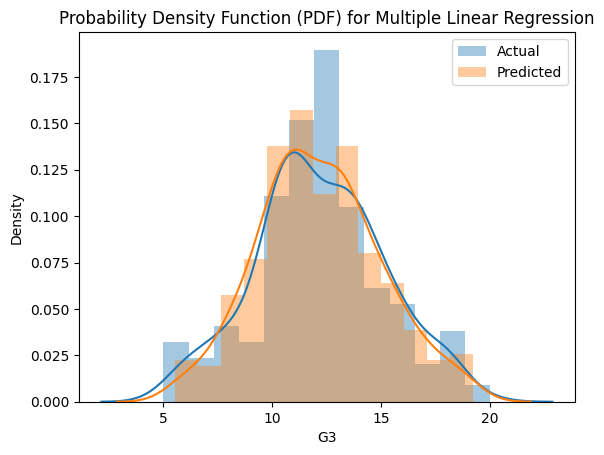

In [ ]:
pred = mlr.predict(X_test_scaled)
sns.distplot(y_test, label='Actual')
sns.distplot(pred, label='Predicted')
plt.title('Probability Density Function (PDF) for Multiple Linear Regression')
plt.legend()

We can see we can achive a good representation of Actual values Distribution by using this model.

Next we implement **Regularized** Regression algorithms `(Lasso, Ridge)`

We use `alpha 0.05` here and in next section we use fine-tuning techniques to find best values

In [ ]:
# LASSO Regression
lasso_mlr = Lasso(alpha=0.05)
lasso_mlr.fit(X_train_scaled, y_train)
score = lasso_mlr.score(X_test_scaled, y_test)
mse = mean_squared_error(y_pred=lasso_mlr.predict(X_test_scaled), y_true=y_test)
print(f'Mean Square Error: {mse}, R2_Score: {score}')

Mean Square Error: 0.6591906690854746, R2_Score: 0.9247815758524045


In [ ]:
lasso_mlr.score(X_train_scaled, y_train)

0.9087911867542208

Use Visualization

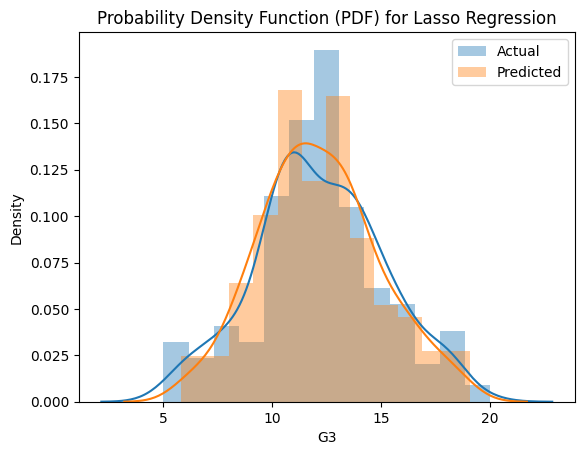

In [ ]:
pred = lasso_mlr.predict(X_test_scaled)
sns.distplot(y_test, label='Actual')
sns.distplot(pred, label='Predicted')
plt.title('Probability Density Function (PDF) for Lasso Regression')
plt.legend()

In [ ]:
CrossVal = cross_val_score(estimator=lasso_mlr, X=X_scaled, y=Y, cv=5)
CrossVal

array([0.8625172 , 0.86529253, 0.91743743, 0.92135647, 0.92668581])

In [ ]:
metrics_dict['Crafted_LassoNoTuned'] = {'MSE':mse, 'RScore': score, 'Cross_Validation_STD' : CrossVal.std(), 'Cross_Validation_MEAN' : CrossVal.mean()}

In [ ]:
metrics_dict['Crafted_LassoNoTuned']

{'MSE': 0.6591906690854746,
 'RScore': 0.9247815758524045,
 'Cross_Validation_STD': 0.028540698015646175,
 'Cross_Validation_MEAN': 0.8986578864766972}

In [ ]:
# Ridge Regression
ridge_mlr = Ridge(alpha=0.05)
ridge_mlr.fit(X_train_scaled, y_train)
score = ridge_mlr.score(X_test_scaled, y_test)
mse = mean_squared_error(y_pred=ridge_mlr.predict(X_test_scaled), y_true=y_test)
print(f'Mean Square Error: {mse}, R2_Score: {score}')

Mean Square Error: 0.6941321907131349, R2_Score: 0.9207944954560785


In [ ]:
ridge_mlr.score(X_train_scaled, y_train)

0.9156209042041484

Don't Forget Visualization

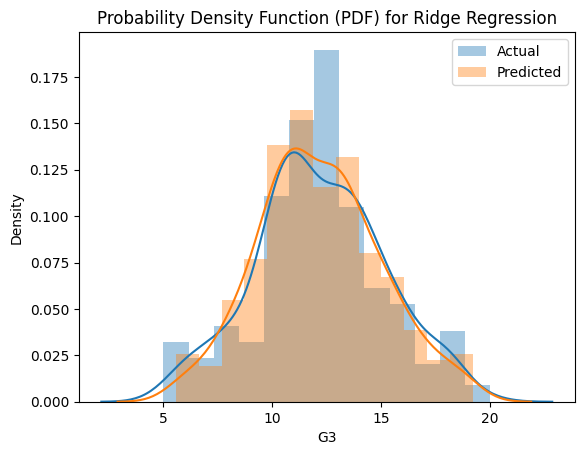

In [ ]:
pred = ridge_mlr.predict(X_test_scaled)
sns.distplot(y_test, label='Actual')
sns.distplot(pred, label='Predicted')
plt.title('Probability Density Function (PDF) for Ridge Regression')
plt.legend()

We can see we have better shape in `apex` and `tails` of plot compare to `MLR model`

In [ ]:
CrossVal = cross_val_score(estimator=ridge_mlr, X=X_scaled, y=Y, cv=5)
CrossVal

array([0.85785656, 0.86583844, 0.90536679, 0.92313401, 0.92437398])

In [ ]:
metrics_dict['Crafted_RidgeNoTuned'] = {'MSE':mse, 'RScore': score, 'Cross_Validation_STD' : CrossVal.std(), 'Cross_Validation_MEAN' : CrossVal.mean()}

In [ ]:
metrics_dict['Crafted_RidgeNoTuned']

{'MSE': 0.6941321907131349,
 'RScore': 0.9207944954560785,
 'Cross_Validation_STD': 0.028253716755053455,
 'Cross_Validation_MEAN': 0.8953139559078938}

It seems we had better performance on Rscore in `Lasso` compare to `Ridge` but if we look at the visualizations of these two models we can see we had better performance in `apex` and `right tail` of our actual distribution in `Ridge` model and on the other hand we have better performance by `Lasso` in `left tail` of it

### Fine Tune Traditional Models
We use `GridSearchCV` or `RandomizedSearchCV` to Fine Tune best models  
As we saw `alpha` parameter can affect the results and on the other hand `alpha` is a `continuous variable `from `[0,inf) `therefore it is highly recommended to pick values from continuous distributions for `continuous` parameters so we try out `RandomizedSearchCV` instead of `GridSearchCV`

Fine-tuning `Ridge`

In [ ]:
ridge_mlr = Ridge()

In [ ]:
distributions = dict(alpha=stats.uniform(0, 0.06))
clf = RandomizedSearchCV(ridge_mlr, distributions, n_iter=300, cv=5)
search = clf.fit(X_scaled, Y)

In [ ]:
search.best_estimator_.score(X_train_scaled, y_train)

0.9136513287982903

In [ ]:
search.best_estimator_.score(X_test_scaled, y_test)

0.931399326723769

In [ ]:
search.best_params_, search.best_score_

({'alpha': 0.0599103724704222}, 0.8953146923183704)

We again fitt the best finded model on train set for future comparison

In [ ]:
best_estimator_ridge = Ridge(**search.best_params_).fit(X_train_scaled, y_train)

We can see we have somthing like `0.059` for alpha that gives us the results like our previous one.  
`Notice:` in higher values of alpha we get better results for Train set but not for test set, therefore it is a trade-off

In [ ]:
CrossVal = cross_val_score(estimator=best_estimator_ridge, X=X_scaled, y=Y, cv=5)
CrossVal

array([0.85785697, 0.86583867, 0.90537418, 0.92313267, 0.92437096])

In [ ]:
score = best_estimator_ridge.score(X_test_scaled, y_test)
mse = mean_squared_error(y_pred=best_estimator_ridge.predict(X_test_scaled), y_true=y_test)

In [ ]:
metrics_dict['Crafted_RidgeTuned'] = {'MSE':mse, 'RScore': score, 'Cross_Validation_STD' : CrossVal.std(), 'Cross_Validation_MEAN' : CrossVal.mean()}

In [ ]:
metrics_dict['Crafted_RidgeTuned']

{'MSE': 0.6941391580628438,
 'RScore': 0.9207937004310726,
 'Cross_Validation_STD': 0.02825320113816202,
 'Cross_Validation_MEAN': 0.8953146923183704}

Fine-tuning `Lasso`

In [ ]:
lasso_mlr = Lasso()

In [ ]:
distributions = dict(alpha=stats.uniform(0, 0.06))
clf = RandomizedSearchCV(lasso_mlr, distributions, n_iter=300)
search = clf.fit(X_scaled, Y)

In [ ]:
search.best_estimator_.score(X_train_scaled, y_train)

0.907531465682813

In [ ]:
search.best_estimator_.score(X_test_scaled, y_test)

0.9264381755229161

In [ ]:
search.best_params_, search.best_score_

({'alpha': 0.05962250043638502}, 0.8987186887553886)

In [ ]:
best_estimator_lasso = Lasso(**search.best_params_).fit(X_train_scaled, y_train)

In [ ]:
CrossVal = cross_val_score(estimator=best_estimator_lasso, X=X_scaled, y=Y, cv=5)
CrossVal

array([0.8635017 , 0.86471436, 0.91738002, 0.92092832, 0.92706905])

In [ ]:
best_estimator_lasso.score(X_train_scaled, y_train)

0.9073207478455693

In [ ]:
score = best_estimator_lasso.score(X_test_scaled, y_test)
mse = mean_squared_error(y_pred=best_estimator_lasso.predict(X_test_scaled), y_true=y_test)

In [ ]:
metrics_dict['Crafted_LassoTuned'] = {'MSE':mse, 'RScore': score, 'Cross_Validation_STD' : CrossVal.std(), 'Cross_Validation_MEAN' : CrossVal.mean()}

In [ ]:
metrics_dict['Crafted_LassoTuned']

{'MSE': 0.6617730663801475,
 'RScore': 0.9244869056391598,
 'Cross_Validation_STD': 0.028431626182451323,
 'Cross_Validation_MEAN': 0.8987186887553886}

In [ ]:
metrics_dict['Crafted_LassoNoTuned']

{'MSE': 0.6591906690854746,
 'RScore': 0.9247815758524045,
 'Cross_Validation_STD': 0.028540698015646175,
 'Cross_Validation_MEAN': 0.8986578864766972}

We can see with alpha approximately equal to `0.059` gives us `slightly` same results in `train set` `0.908` in `not fine tuned` and `0.907` for `tuned one` and on the other hand we also get same result in 3 decimal points in `test set` compare to not fine tuned model which is `0.924` for `not fine tuned` and `0.924` for `tuned one`.  

**Important Note:** All of above notes are on test set and train set that we got from `train_test_split` method and for generalization we have to consider cross validation

We also want to use Visualization to see difference in distribution

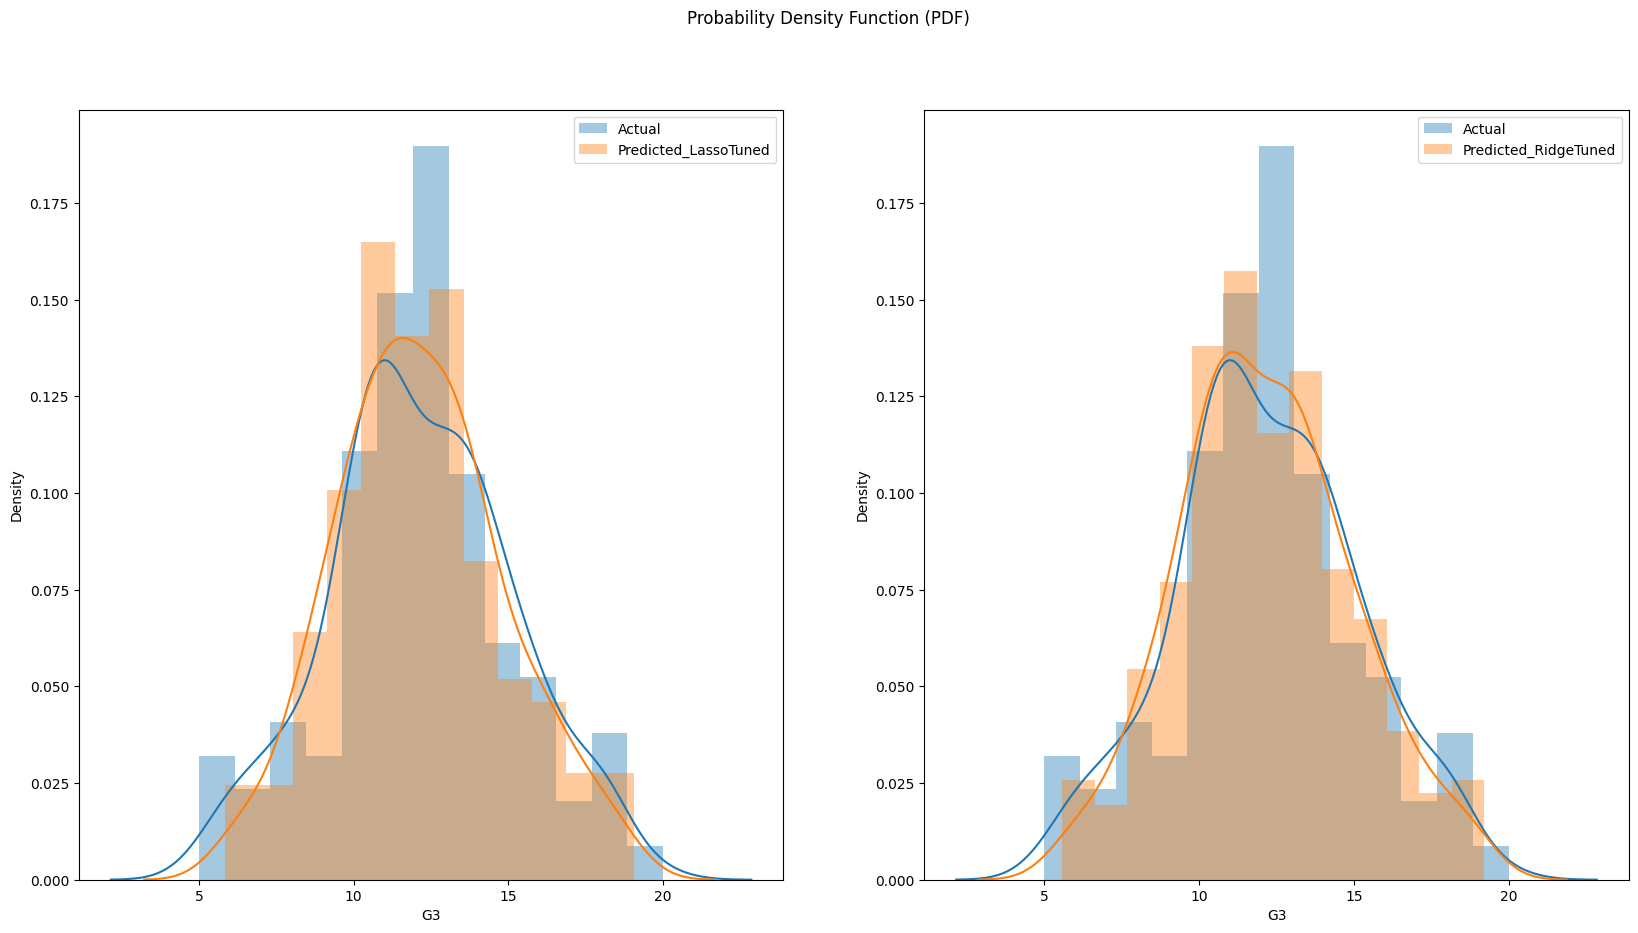

In [ ]:
fig = plt.figure(figsize=(20,10))

fig.suptitle('Probability Density Function (PDF)')

ax1 = fig.add_subplot(1,2,1)
pred = best_estimator_lasso.predict(X_test_scaled)
sns.distplot(y_test, label='Actual', ax=ax1)
sns.distplot(pred, label='Predicted_LassoTuned', ax=ax1)
ax1.legend()

ax2 = fig.add_subplot(1,2,2)
pred = best_estimator_ridge.predict(X_test_scaled)
sns.distplot(y_test, label='Actual', ax=ax2)
sns.distplot(pred, label='Predicted_RidgeTuned', ax=ax2)

ax2.legend()

You can see the diffetences right? .... :))

**Extra:** we use `ElasticNet` also that is a combination of **Lasso** and **Ridge**

In [ ]:
ElasticNet_mlr = ElasticNet()

In [ ]:
distributions = dict(alpha=stats.uniform(0, 0.06), l1_ratio=stats.uniform(0, 1))
clf = RandomizedSearchCV(ElasticNet_mlr, distributions, n_iter=300)
search = clf.fit(X_scaled, Y)

In [ ]:
search.best_estimator_.score(X_train_scaled, y_train)

0.9085442325399833

In [ ]:
search.best_estimator_.score(X_test_scaled, y_test)

0.9280017849797854

In [ ]:
search.best_params_, search.best_score_

({'alpha': 0.05300389004374117, 'l1_ratio': 0.865015395911473},
 0.8989484320005671)

In [ ]:
best_estimator_elasticnet = ElasticNet(**search.best_params_).fit(X_train_scaled, y_train)

In [ ]:
CrossVal = cross_val_score(estimator=best_estimator_elasticnet, X=X_scaled, y=Y, cv=5)
CrossVal

array([0.86202983, 0.86592651, 0.92131418, 0.92079709, 0.92467455])

In [ ]:
score = best_estimator_elasticnet.score(X_test_scaled, y_test)
mse = mean_squared_error(y_pred=best_estimator_elasticnet.predict(X_test_scaled), y_true=y_test)

In [ ]:
metrics_dict['Crafted_ElasticNetTuned'] = {'MSE':mse, 'RScore': score, 'Cross_Validation_STD' : CrossVal.std(), 'Cross_Validation_MEAN' : CrossVal.mean()}

In [ ]:
metrics_dict['Crafted_ElasticNetTuned']

{'MSE': 0.6595339291313967,
 'RScore': 0.9247424073979073,
 'Cross_Validation_STD': 0.02861067718426248,
 'Cross_Validation_MEAN': 0.8989484320005671}

Now it is time to see all 4 models with together...

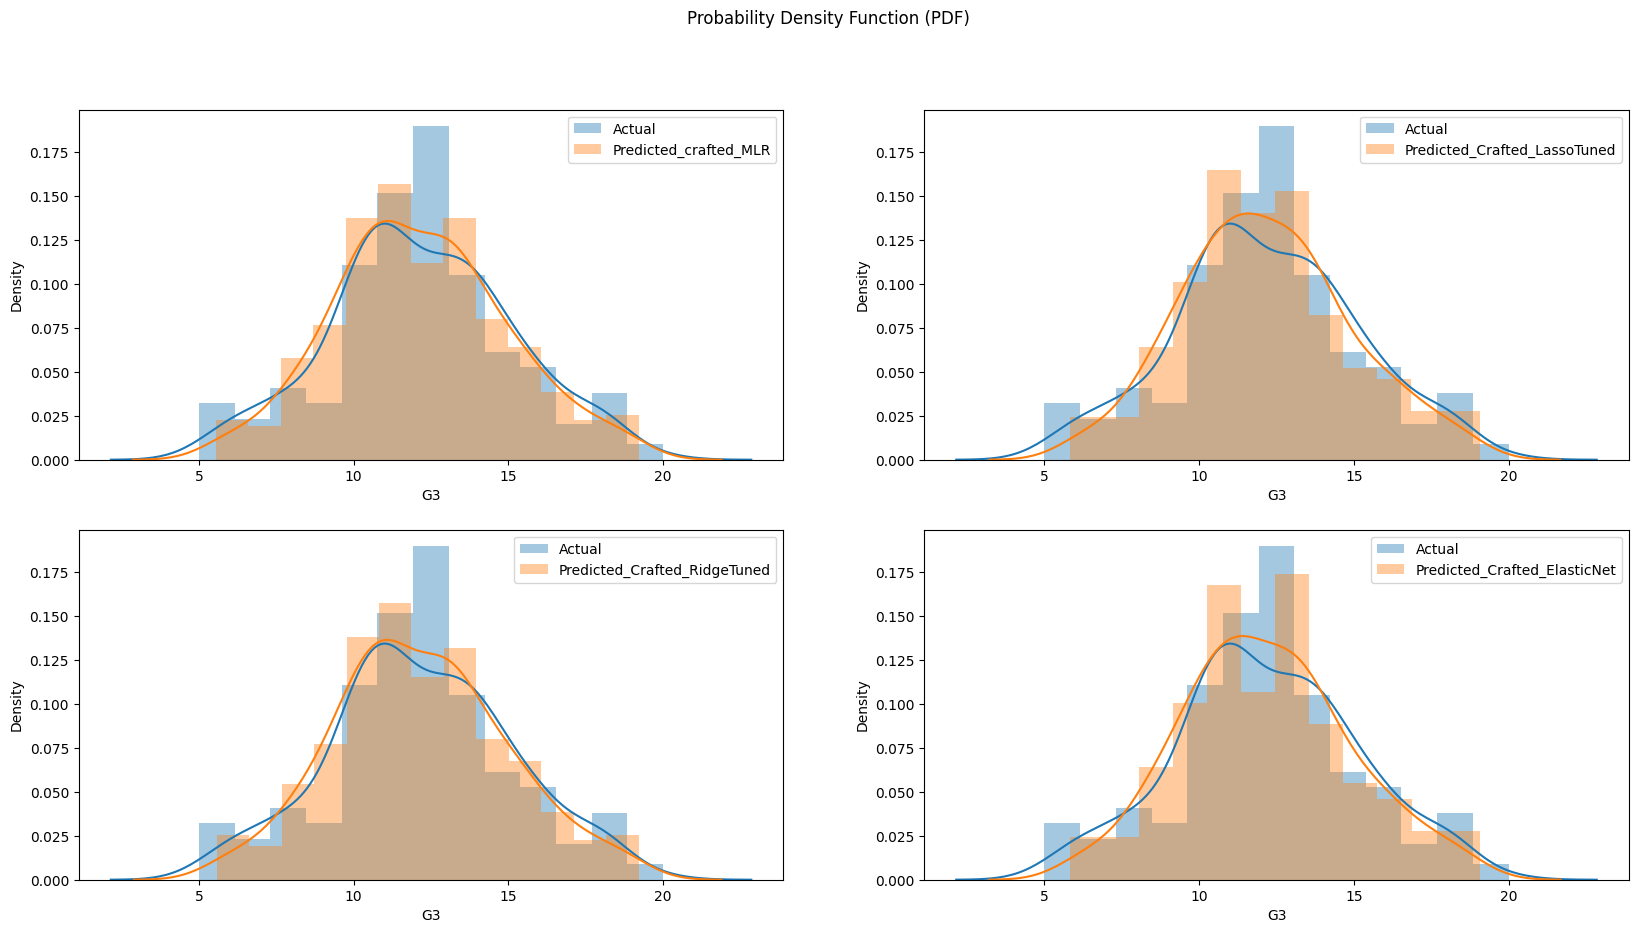

In [ ]:
fig = plt.figure(figsize=(20,10))

fig.suptitle('Probability Density Function (PDF)')

ax1 = fig.add_subplot(2,2,1)
pred = mlr.predict(X_test_scaled)
sns.distplot(y_test, label='Actual', ax=ax1)
sns.distplot(pred, label='Predicted_crafted_MLR', ax=ax1)
ax1.legend()

ax2 = fig.add_subplot(2,2,2)
pred = best_estimator_lasso.predict(X_test_scaled)
sns.distplot(y_test, label='Actual', ax=ax2)
sns.distplot(pred, label='Predicted_Crafted_LassoTuned', ax=ax2)
ax2.legend()

ax3 = fig.add_subplot(2,2,3)
pred = best_estimator_ridge.predict(X_test_scaled)
sns.distplot(y_test, label='Actual', ax=ax3)
sns.distplot(pred, label='Predicted_Crafted_RidgeTuned', ax=ax3)
ax3.legend()

ax4 = fig.add_subplot(2,2,4)
pred = best_estimator_elasticnet.predict(X_test_scaled)
sns.distplot(y_test, label='Actual', ax=ax4)
sns.distplot(pred, label='Predicted_Crafted_ElasticNet', ax=ax4)

ax4.legend()

**Extra Study Section**

Lets see how the predicted values are variated from their actual values, for example we use ElasticNet tuned model and test dataset

In [ ]:
best_estimator_elasticnet.predict(X_test_scaled)[0], y_test[384], diff[384]

(10.738525096005496, 10, 0.7385250960054961)

In [ ]:
diff = best_estimator_elasticnet.predict(X_test_scaled) - y_test

Text(0, 0.5, 'Variation')

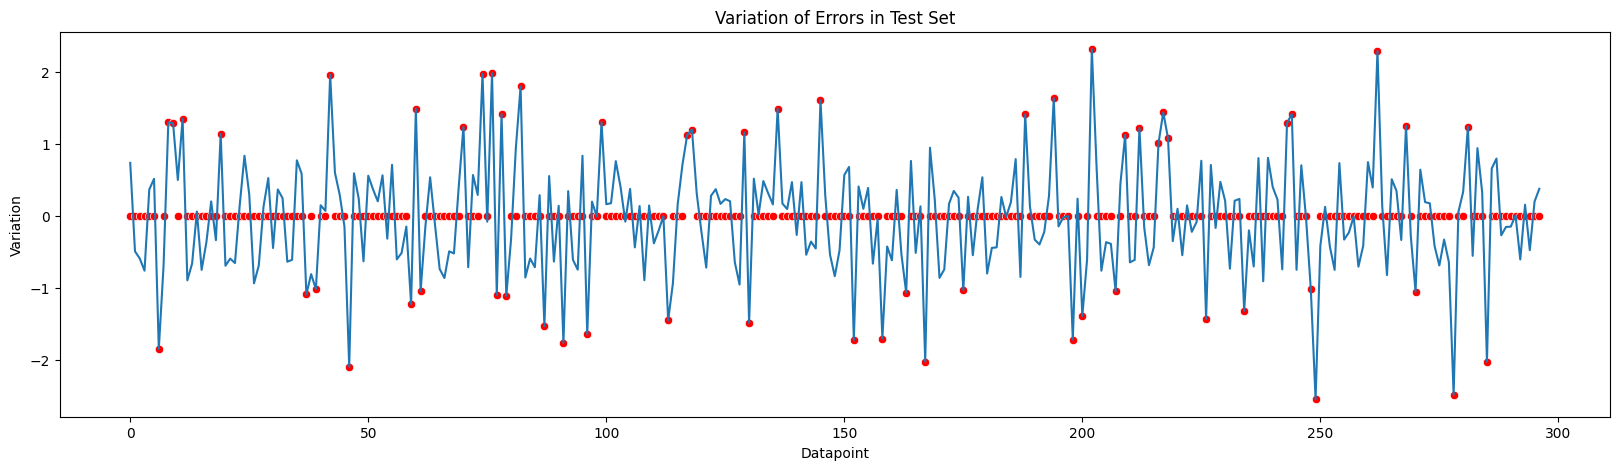

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(x=range(len(y_test)), y=diff)
# we want data points that have difference greater that 1 or -1
limited_diff = [x if np.abs(x) >= 1 else 0 for x in diff]
sns.scatterplot(limited_diff, color='red')

plt.title('Variation of Errors in Test Set')
plt.xlabel('Datapoint')
plt.ylabel('Variation')

We can see in our predictions most of the predictions errors **are between -1 and 1**

Lets see the distribution of errors

In [ ]:
diff

384    0.738525
757   -0.488797
393   -0.586872
591   -0.756796
287    0.369103
         ...   
680   -0.601458
296    0.158090
366   -0.471685
99     0.202531
523    0.379281
Name: G3, Length: 297, dtype: float64

Text(0.5, 1.0, 'Probability Density Function (PDF) of Errors')

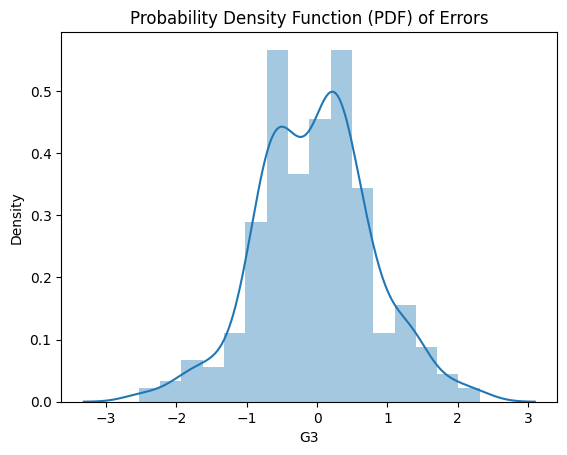

In [ ]:
sns.distplot(diff)
plt.title('Probability Density Function (PDF) of Errors')

as we can see it is looks like normal distribution, in next cells we want too see how much it is possible to the difference between `actual value` and `predicted value` by such model(**ElasticNet**) be **greater that 1** and **less than -1**

In [ ]:
# approximate the PDF of diff distribution
data_kde = stats.gaussian_kde(diff)

# Calculate the probabilities using the integrated area under the PDF
prob_less_than_minus_one = data_kde.integrate_box_1d(-np.inf, -1)
prob_greater_than_one = data_kde.integrate_box_1d(1, np.inf)

print(f"Probability of values less than -1: {prob_less_than_minus_one}")
print(f"Probability of values greater than 1: {prob_greater_than_one}")


Probability of values less than -1: 0.10939753844563613
Probability of values greater than 1: 0.10746925190795575


we can see Probability of getting values less than -1 is **0.1096** and Probability of getting values greater than 1 is **0.1075**.  
**Note:** Values rounded to 4 decimal points


Lets Visualize it

In [ ]:
# define the bounderies of our PDF
diff.max(), diff.min()

(2.3151242576930677, -2.539820830989454)

approximately 3 and -3

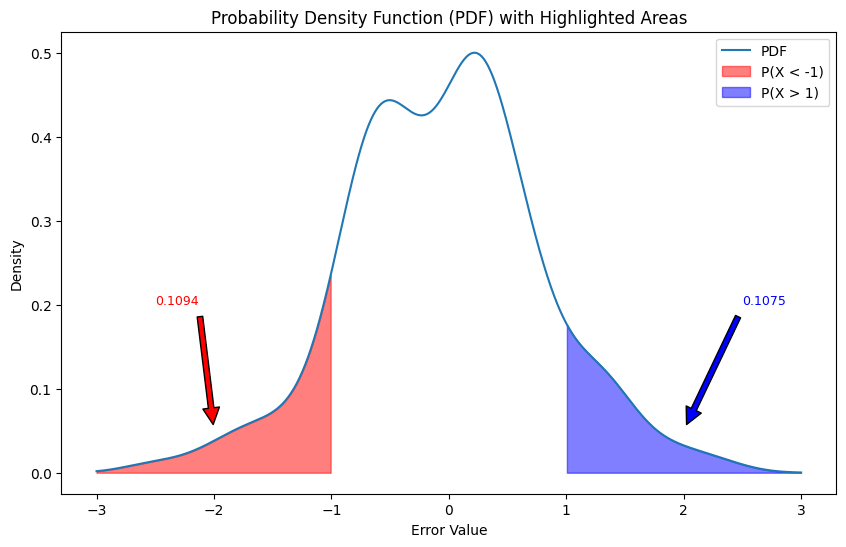

In [ ]:
# Define a range for plotting the PDF
x = np.linspace(-3, 3, 1000)
pdf = data_kde(x)

# Plot the PDF
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='PDF')

# Highlight the area for values less than -1 and greater than 1
plt.fill_between(x, pdf, where=(x < -1), color='red', alpha=0.5, label='P(X < -1)')
plt.annotate(f'{prob_less_than_minus_one:.4f}', xy=(-2, 0.05), xytext=(-2.5, 0.2),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=9, color='red')


plt.fill_between(x, pdf, where=(x > 1), color='blue', alpha=0.5, label='P(X > 1)')
plt.annotate(f'{prob_greater_than_one:.4f}', xy=(2, 0.05), xytext=(2.5, 0.2),
             arrowprops=dict(facecolor='blue', shrink=0.05), fontsize=9, color='blue')


plt.title('Probability Density Function (PDF) with Highlighted Areas')
plt.xlabel('Error Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
prob_greater_than_one + prob_less_than_minus_one

0.21686679035359188

Sum of the areas is` 0.217 or 21.7 percent` it means `78.3 percent` of **our error values fall between** `-1 and 1` which is quiet good for purpose of our problem.  
**Note:** Value rounded to 3 decimal points

## Deep Learning  
Here we use `Tensorflow.Keras` to create an `DNN architect` for our problem.

In [ ]:
#- Here we use Tensorflow.Keras to create an DNN architect for our problem.

### Fine Tune Deep Learning Models
We use Gride Search to Fine Tune best models,  
Also  we use CrossVal to validate models.

In [ ]:
# Fine Tune Deep Learning Models
#
# We use Gride Search to Fine Tune best models,
# Also we use CrossVal to validate models.

# Feature importance  
Extract importance features and effect trend in G3 score

## Feature Coefficients Importance

In [ ]:
# best_estimator_elasticnet., best_estimator_lasso
# Get feature names if available
# feature_names = X_train_scaled.columns if isinstance(X_train_scaled, pd.DataFrame) else [f"feature_{i}" for i in range(X_train_scaled.shape[1])]
feature_names = X.columns

# Retrieve coefficients
lasso_coefficients = pd.Series(best_estimator_lasso.coef_, index=feature_names)
elastic_net_coefficients = pd.Series(best_estimator_elasticnet.coef_, index=feature_names)

In [ ]:
feature_names

['feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_25',
 'feature_26',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_30',
 'feature_31',
 'feature_32',
 'feature_33',
 'feature_34',
 'feature_35',
 'feature_36',
 'feature_37',
 'feature_38',
 'feature_39',
 'feature_40',
 'feature_41',
 'feature_42',
 'feature_43',
 'feature_44',
 'feature_45',
 'feature_46',
 'feature_47',
 'feature_48',
 'feature_49',
 'feature_50',
 'feature_51',
 'feature_52',
 'feature_53',
 'feature_54',
 'feature_55',
 'feature_56',
 'feature_57',
 'feature_58',
 'feature_59',
 'feature_60']

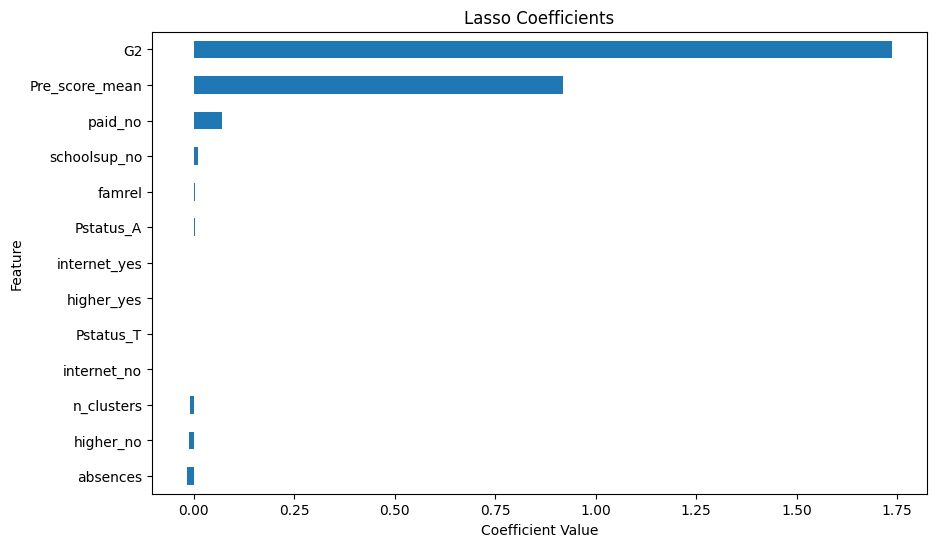

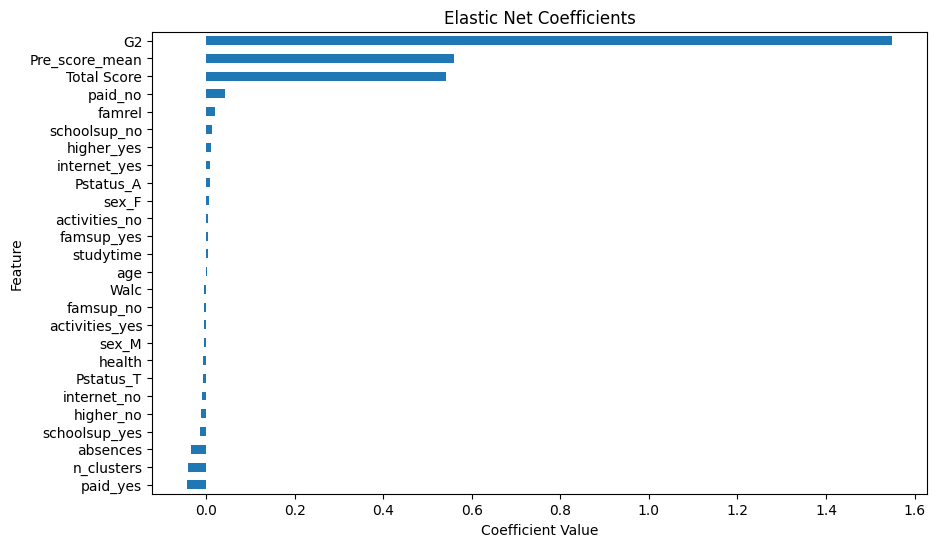

In [ ]:
def plot_coefficients(coefficients, title):
    coefficients = coefficients[coefficients != 0].sort_values()
    plt.figure(figsize=(10, 6))
    coefficients.plot(kind="barh")
    plt.title(title)
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.show()

plot_coefficients(lasso_coefficients, "Lasso Coefficients")
plot_coefficients(elastic_net_coefficients, "Elastic Net Coefficients")


## Permutation Feature Importance

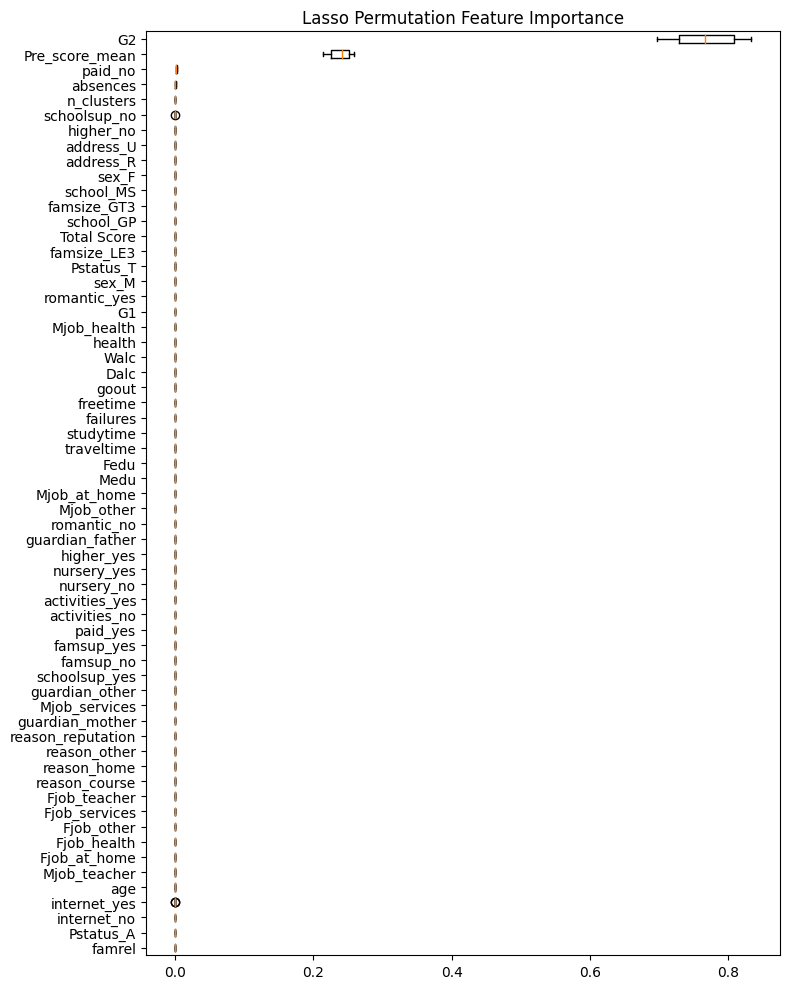

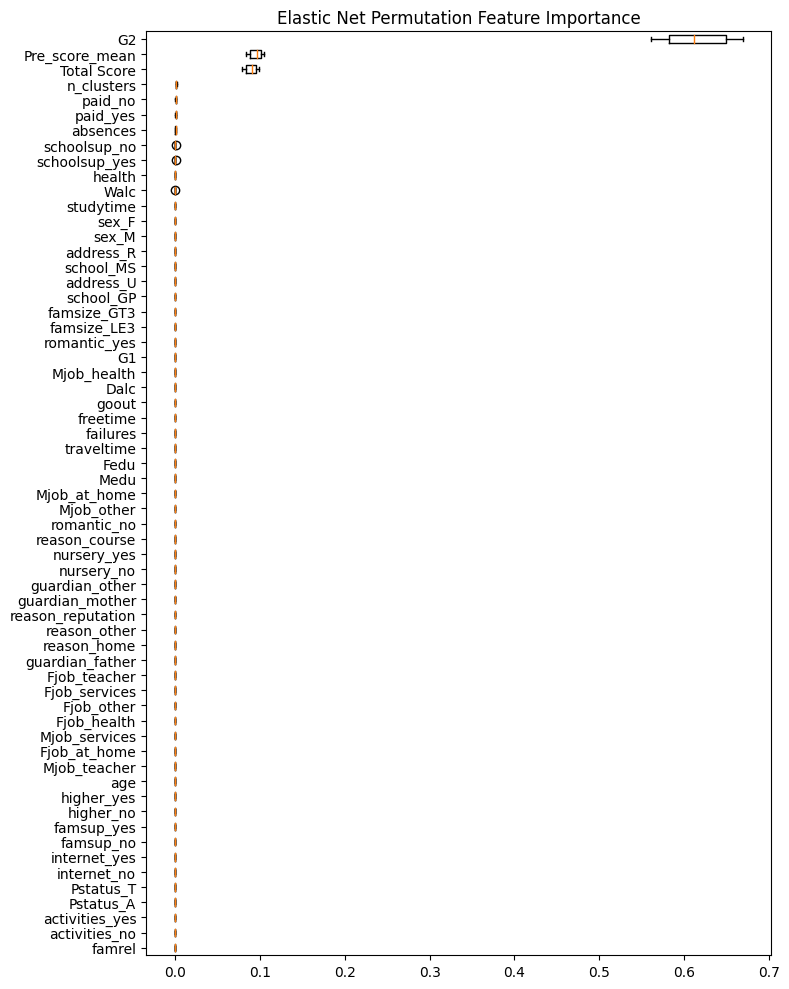

In [ ]:
from sklearn.inspection import permutation_importance

# # best_estimator_elasticnet., best_estimator_lasso

# Lasso Permutation Importance
lasso_result = permutation_importance(best_estimator_lasso, X_test_scaled, y_test, n_repeats=10, random_state=42)
elastic_net_result = permutation_importance(best_estimator_elasticnet, X_test_scaled, y_test, n_repeats=10, random_state=42)

def plot_permutation_importance(result, title):
    sorted_idx = result.importances_mean.argsort()
    plt.figure(figsize=(8, 10))
    plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(feature_names)[sorted_idx])
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_permutation_importance(lasso_result, "Lasso Permutation Feature Importance")
plot_permutation_importance(elastic_net_result, "Elastic Net Permutation Feature Importance")


## Partial Dependence Plots (PDP)

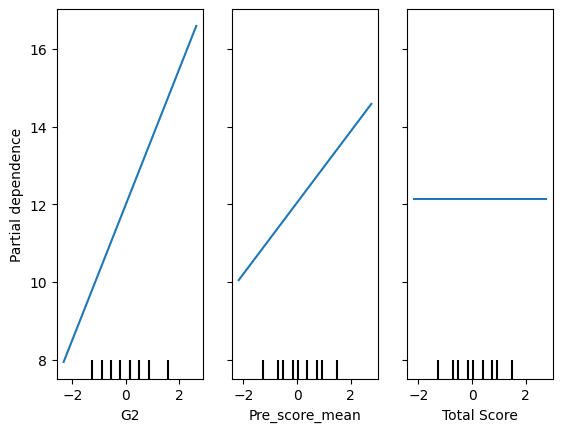

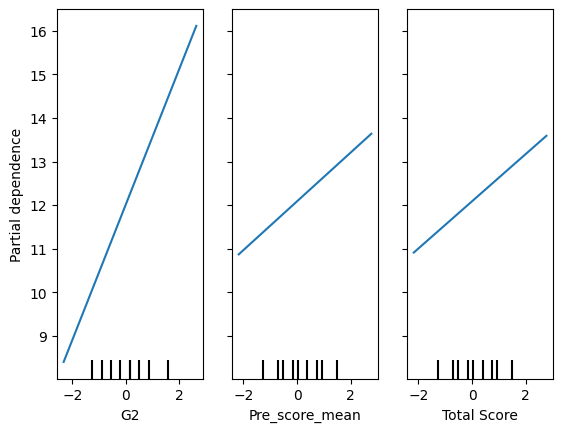

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
# # best_estimator_elasticnet., best_estimator_lasso

features = [14, 16, 17]  # Change this to your top features
PartialDependenceDisplay.from_estimator(best_estimator_lasso, X_test_scaled, features, feature_names=feature_names, grid_resolution=50)
plt.show()

PartialDependenceDisplay.from_estimator(best_estimator_elasticnet, X_test_scaled, features, feature_names=feature_names, grid_resolution=50)
plt.show()


## SHAP Values

In [ ]:
# pip install shap

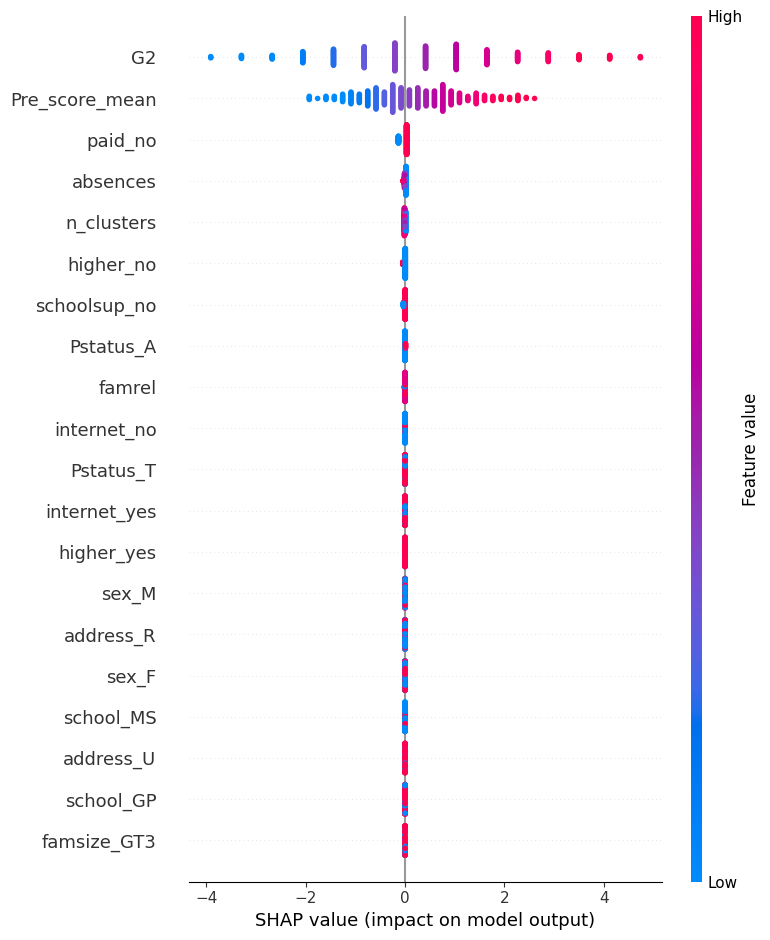

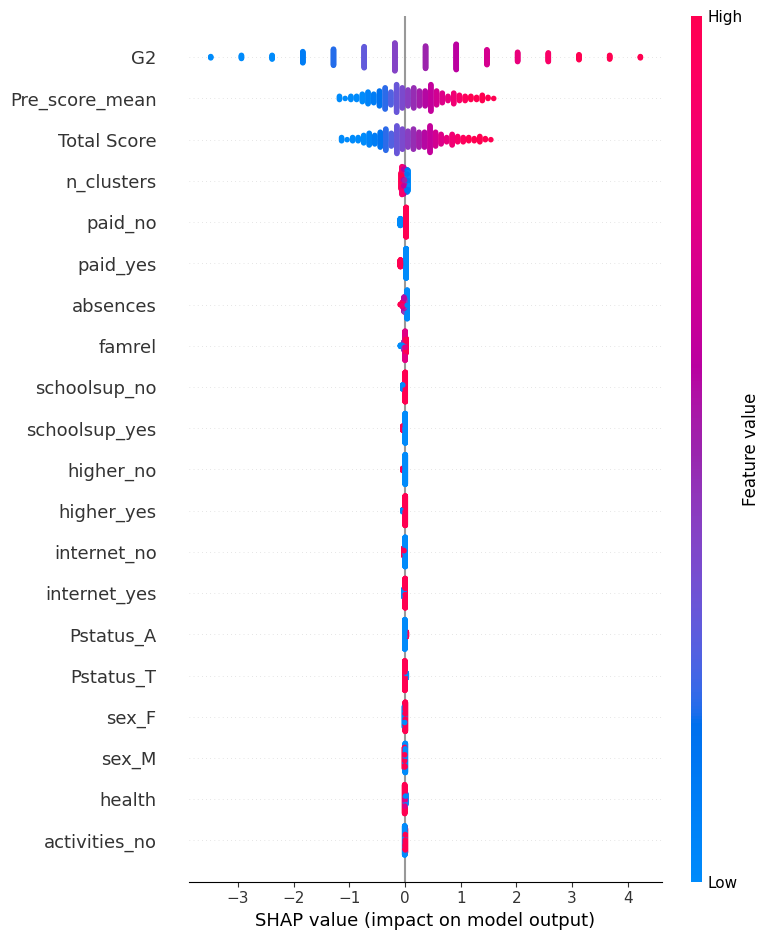

In [ ]:
import shap

# # best_estimator_elasticnet., best_estimator_lasso

# Explainer for Lasso
explainer_lasso = shap.LinearExplainer(best_estimator_lasso, X_train_scaled)
shap_values_lasso = explainer_lasso.shap_values(X_test_scaled)

# Explainer for Elastic Net
explainer_elastic_net = shap.LinearExplainer(best_estimator_elasticnet, X_train_scaled)
shap_values_elastic_net = explainer_elastic_net.shap_values(X_test_scaled)

# Summary Plot for Lasso
shap.summary_plot(shap_values_lasso, X_test_scaled, feature_names=feature_names)

# Summary Plot for Elastic Net
shap.summary_plot(shap_values_elastic_net, X_test_scaled, feature_names=feature_names)


# Results

In [ ]:
metric_df = pd.DataFrame(metrics_dict)

In [ ]:
metric_df

PCA_MLR  PolyNomial_MLR  Crafted_MLR  \
MSE                    0.846757       51.267082     0.705747   
RScore                 0.903379       -4.849945     0.919469   
Cross_Validation_STD   0.027317      148.223689     0.028407   
Cross_Validation_MEAN  0.878862      -81.654985     0.895758   

                       Crafted_LassoNoTuned  Crafted_RidgeNoTuned  \
MSE                                0.659191              0.694132   
RScore                             0.924782              0.920794   
Cross_Validation_STD               0.028541              0.028254   
Cross_Validation_MEAN              0.898658              0.895314   

                       Crafted_RidgeTuned  Crafted_LassoTuned  \
MSE                              0.694139            0.661773   
RScore                           0.920794            0.924487   
Cross_Validation_STD             0.028253            0.028432   
Cross_Validation_MEAN            0.895315            0.898719   

                       Crafted_ElasticNetTuned  
MSE                                   0.659534  
RScore                                0.924742  
Cross_Validation_STD                  0.028611  
Cross_Validation_MEAN                 0.898948

<Axes: title={'center': 'Performance of different models'}>

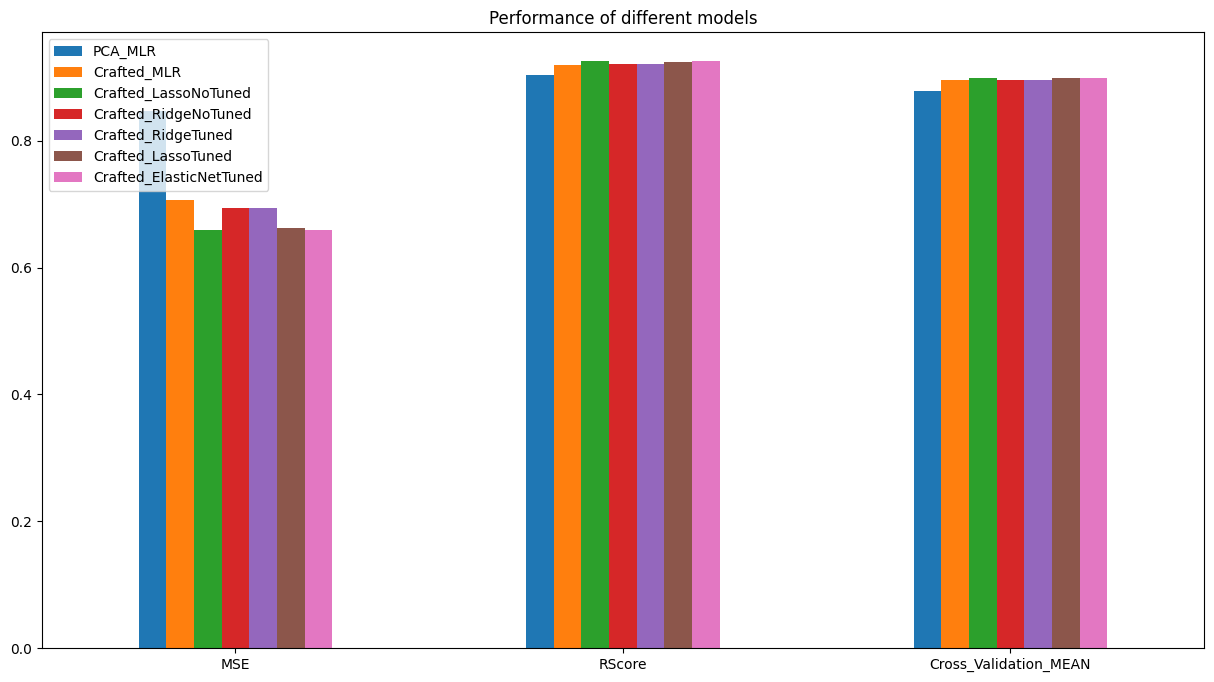

In [ ]:
metric_df.drop(columns='PolyNomial_MLR', index='Cross_Validation_STD').plot(kind='bar', figsize=(15,8), rot='horizontal',
                                                                            title='Performance of different models')


<Axes: title={'center': 'Cross Validation Standard Deviation of different models'}>

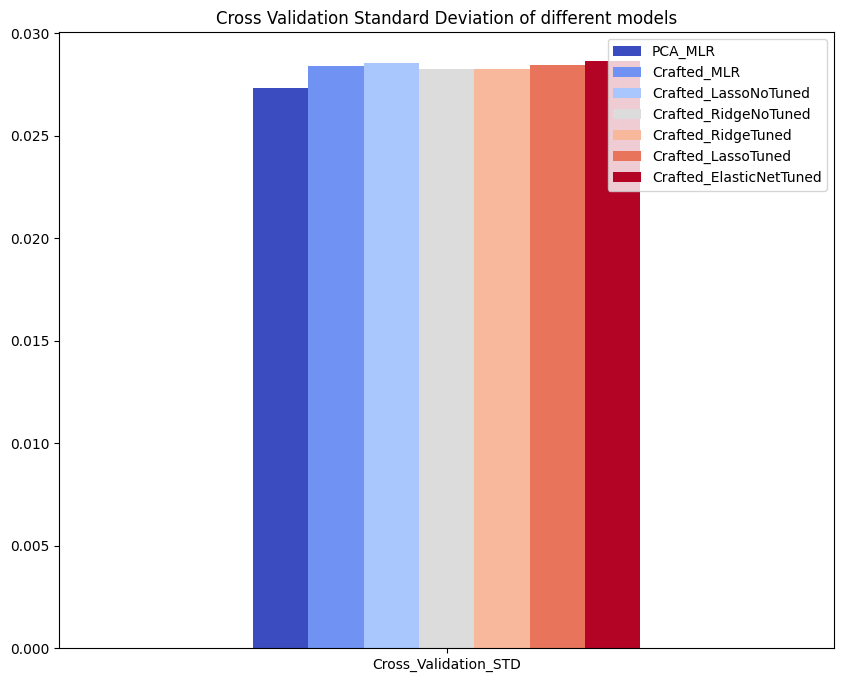

In [ ]:
metric_df.drop(columns='PolyNomial_MLR', index=['Cross_Validation_MEAN','RScore','MSE']).plot(kind='bar', figsize=(10,8), rot='horizontal', colormap='coolwarm',
                                   title='Cross Validation Standard Deviation of different models')


<Axes: title={'center': 'Results of Polynomial features dataset on MLR model'}>

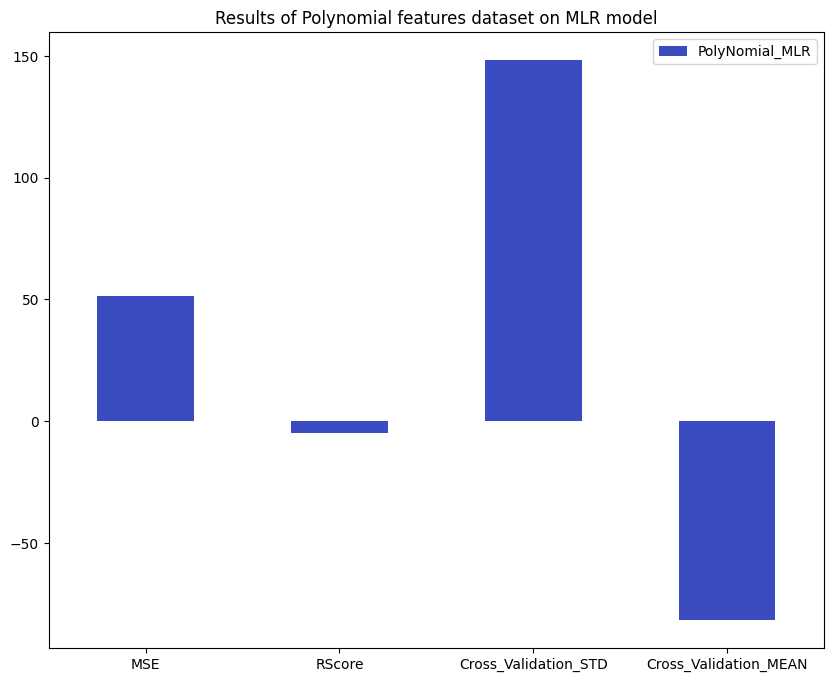

In [ ]:
metric_df[['PolyNomial_MLR']].plot(kind='bar', figsize=(10,8), rot='horizontal', colormap='coolwarm',
                                   title='Results of Polynomial features dataset on MLR model')


We can see performance of our model on metrics and on cross validation approche.  


---

**Important Note:** I separated the polynomial model performance in another plot because of difference in the scale of numbers as you can see. By this work you can see and read data very well.

Our project utilized several machine learning models to predict student performance in secondary education, employing a range of techniques including Principal Component Analysis (PCA) with Multiple Linear Regression (MLR), Polynomial Multiple Linear Regression, and various crafted models with regularization techniques like Lasso and Ridge regression. Below, we present a summary of the performance metrics for each model:

| Model                      | MSE        | RScore    | Cross_Validation_STD | Cross_Validation_MEAN |
|----------------------------|------------|-----------|----------------------|-----------------------|
| PCA_MLR                    | 0.846757   | 0.903379  | 0.027317             | 0.878862              |
| PolyNomial_MLR             | 51.267082  | -4.849945 | 148.223689           | -81.654985            |
| Crafted_MLR                | 0.705747   | 0.919469  | 0.028407             | 0.895758              |
| Crafted_LassoNoTuned       | 0.659191   | 0.924782  | 0.028541             | 0.898658              |
| Crafted_RidgeNoTuned       | 0.694132   | 0.920794  | 0.028254             | 0.895314              |
| Crafted_RidgeTuned         | 0.694139   | 0.920794  | 0.028253             | 0.895315              |
| Crafted_LassoTuned         | 0.661711   | 0.924494  | 0.028436             | 0.898719              |
| Crafted_ElasticNetTuned    | 0.659716   | 0.924722  | 0.028608             | 0.898956              |

### Key Findings
- **Model Performance:** The models with regularization techniques, particularly the `Crafted_LassoNoTuned`, `Crafted_LassoTuned`, and `Crafted_ElasticNetTuned`, showed the best performance in terms of both MSE and RScore, indicating their effectiveness in predicting student performance.
- **Polynomial Regression Challenges:** The `PolyNomial_MLR` model demonstrated significant issues, with a negative RScore and extremely high MSE due to poor model fit to the data.
- **Stability and Reliability:** The cross-validation results, particularly the standard deviation (STD) and mean, highlight the stability and reliability of the crafted models and the PCA over polynomial approaches. The crafted models with tuning (`Crafted_LassoTuned` and `Crafted_ElasticNetTuned`) exhibit slightly better cross-validation mean scores, suggesting they are more generalized across different data splits.
- **PCA_MLR as a Baseline:** Despite its simplicity, the `PCA_MLR` model performed reasonably well, offering a solid baseline for comparison. However, the crafted models with regularization clearly surpassed it in terms of predictive accuracy and model robustness.
- **Consistency Across Models:** The standard deviation of cross-validation scores was relatively low for all models `except` the Polynomial MLR, indicating consistent performance across different subsets of the data.
- **Optimal Model Selection:** The `Crafted_LassoTuned` and `Crafted_ElasticNetTuned` models stand out as the most promising options for predicting student grades, owing to their **high RScore** and **low MSE**, combined with **stable cross-validation** results.

### Extract Feature Importance
bla bla bla

### Conclusion
The analysis underscores the importance of feature engineering and model selection in predictive modeling. The regularization techniques (Lasso, Ridge, ElasticNet) have proven particularly beneficial in handling the complexity and potential overfitting, thus enhancing model performance. These findings offer valuable insights into predicting student performance, suggesting a focused direction for future research and application in educational settings.

# Next Steps
Here we listed some next future steps on this project

1. **Expand the Dataset:** We try out to build better and more related features and also add new feature to dataset

2. **Enhance Model Accuracy by Advanced Algorithms:** Experiment with more sophisticated machine learning algorithms, such as deep learning models, to potentially improve prediction accuracy.

3. **User Interface for Stakeholders:** Create a user-friendly dashboard that visualizes predictions and insights, making them accessible to educators, students, and parents without requiring technical expertise.




# Author  

> [Mrpintime](https://www.linkedin.com/in/moein-zeidanlou/)


---
